# Exploratorio Data Analysis - Mateo Kovačić

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Kurtosis
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/kovacic-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,LCMF,95,98,88,90,0,0,...,0,0,0,1,3,1,33,3,2,67
1,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,"LCMF, LCMF3",95,95,68,72,0,0,...,0,0,0,2,9,4,44,5,2,40
2,Chelsea - Borussia Dortmund 2:0,Europe. UEFA Champions League,3/7/23,"LCMF, LCMF3",85,76,39,51,0,0,...,6,0,0,5,13,5,38,4,1,25
3,Salzburg - Chelsea 1:2,Europe. UEFA Champions League,10/25/22,LCMF,68,61,47,77,1,0,...,0,0,0,5,6,1,17,6,5,83
4,Milan - Chelsea 0:2,Europe. UEFA Champions League,10/11/22,"LCMF3, RCMF",99,98,84,86,0,0,...,2,2,100,1,4,1,25,4,2,50
5,Chelsea - Milan 3:0,Europe. UEFA Champions League,10/5/22,LCMF,70,60,45,75,0,0,...,0,0,0,4,8,1,13,6,3,50
6,Chelsea - Salzburg 1:1,Europe. UEFA Champions League,9/14/22,LDMF,84,65,40,62,0,0,...,2,1,50,1,13,6,46,5,4,80
7,Dinamo Zagreb - Chelsea 1:0,Europe. UEFA Champions League,9/6/22,LCMF,59,115,95,83,0,0,...,0,0,0,3,6,2,33,7,3,43
8,Real Madrid - Chelsea 2:3 (E),Europe. UEFA Champions League,4/12/22,LCMF,110,131,104,79,0,0,...,1,1,100,2,7,3,43,7,4,57
9,Chelsea - Real Madrid 1:3,Europe. UEFA Champions League,4/6/22,LDMF,51,70,56,80,0,0,...,0,0,0,2,3,0,0,1,1,100


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     18 non-null     object 
 1   competition               18 non-null     object 
 2   date                      18 non-null     object 
 3   position                  18 non-null     object 
 4   minutes_played            18 non-null     int64  
 5   total_actions             18 non-null     int64  
 6   total_actions_successful  18 non-null     int64  
 7   TAS_percent               18 non-null     int64  
 8   goals                     18 non-null     int64  
 9   assists                   18 non-null     int64  
 10  shots                     18 non-null     int64  
 11  shots_on_target           18 non-null     int64  
 12  SOT_percent               18 non-null     int64  
 13  xG                        18 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(18, 39)


In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,77.000000,87.333333,68.000000,75.666667,0.055556,0.0,0.500000,0.111111,11.111111,0.033333,...,1.000000,0.388889,20.388889,2.444444,6.722222,2.388889,31.555556,4.888889,2.388889,50.111111
std,23.886989,38.081955,34.722429,9.815953,0.235702,0.0,0.618347,0.323381,32.338083,0.049110,...,1.608799,0.697802,35.978979,1.652884,3.544765,1.883017,17.650936,2.272311,1.685191,29.573217
min,18.000000,13.000000,9.000000,51.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,61.250000,62.000000,41.250000,71.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,25.000000,3.250000,1.000000,34.750000
50%,84.500000,95.000000,69.500000,76.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,6.500000,2.000000,33.000000,5.000000,2.000000,50.000000
75%,95.000000,103.500000,87.750000,83.750000,0.000000,0.0,1.000000,0.000000,0.000000,0.057500,...,2.000000,0.750000,37.500000,3.000000,9.000000,3.750000,43.750000,6.000000,3.750000,67.000000
max,110.000000,174.000000,148.000000,90.000000,1.000000,0.0,2.000000,1.000000,100.000000,0.130000,...,6.000000,2.000000,100.000000,6.000000,13.000000,6.000000,67.000000,9.000000,6.000000,100.000000


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

LCMF                9
LCMF, LCMF3         3
LDMF                2
LCMF3               1
DMF, LCMF, LCMF3    1
LW                  1
LCMF3, RCMF         1
Name: position, dtype: int64
LCMF           9
LCMF, LCMF3    3
LDMF           2
Name: position, dtype: int64
4.666666666666667


- LCMF: This stands for "Left Center Midfielder". In this role, Kovacic operates primarily in the center of the pitch, but veers more towards the left side. His responsibilities include creating goal-scoring opportunities for the forwards, controlling the game in the midfield, and also aiding the defense when required. This role capitalizes on Kovacic's excellent vision and passing skills, along with his ability to make incisive runs into the opponent's territory.

- LCMF, LCMF3: The term "LCMF3" doesn't have a standard, direct interpretation in football terms, which suggests that it might be specific to a particular club, league, or formation. However, if we follow naming conventions, it might mean "Left Center Midfielder 3", which could refer to the third choice in the Left Center Midfield position in a team, or perhaps a more advanced or withdrawn role depending on the tactical system used. Kovacic's ability to adapt and perform in various midfield roles makes him an ideal player for this position as well.

- LDMF: This stands for "Left Defensive Midfielder". In this position, Kovacic is situated a bit further back on the pitch than the central midfielder, usually on the left side. His primary responsibility is to intercept the opposing team's attacks, recover the ball, and pass it to the more offensive midfielders or the forwards. This role requires a strong tactical sense and interception skills. Given Kovacic's defensive prowess and his ability to read the game well, he can certainly excel in this role.

These positions each require a unique set of skills and tactical knowledge, and their importance can vary depending on the playing system a team decides to use. Mateo Kovacic's versatility and well-rounded skill set make him a valuable player in any of these roles.

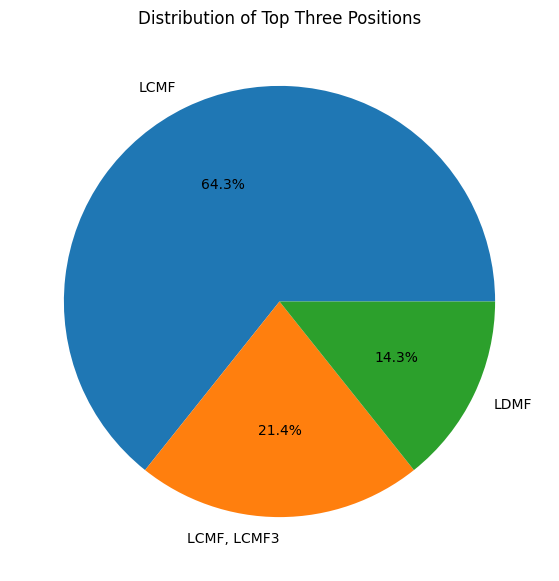

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

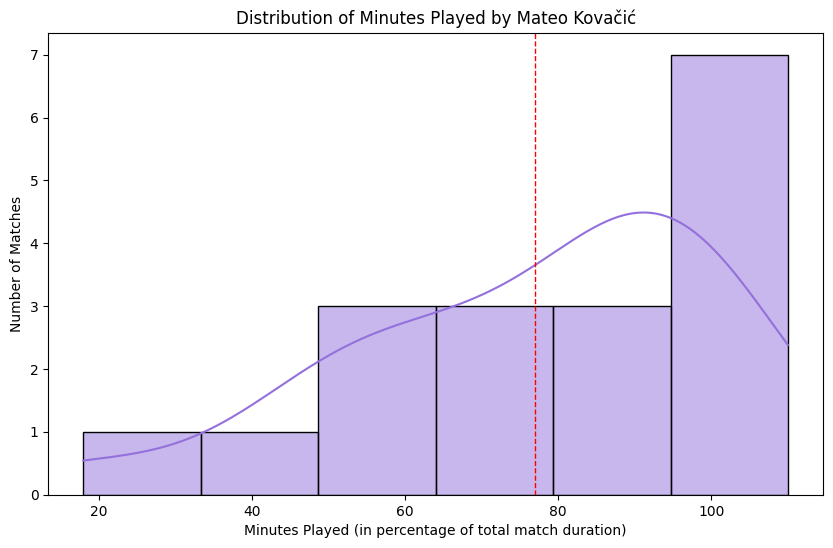

Mateo Kovačić played on average 77.0 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='mediumpurple')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Mateo Kovačić')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Mateo Kovačić played on average {average_minutes_played} minutes per match.")

## Interceptions

Mateo Kovačić has an average of 2.4444444444444446 interceptions per match.
The minimum interceptions in a match by Mateo Kovačić is 0.
The maximum interceptions in a match by Mateo Kovačić is 6.


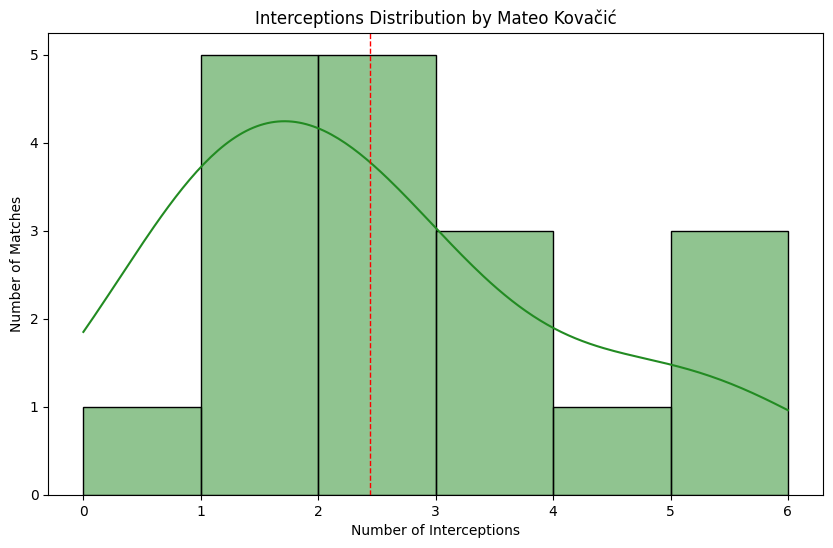

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Mateo Kovačić has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Mateo Kovačić is {min_interceptions}.")
print(f"The maximum interceptions in a match by Mateo Kovačić is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='forestgreen')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Interceptions Distribution by Mateo Kovačić')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'dribbles_successful','duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.19307371564589326
Kurtosis of passes_accurate: -0.6720781469735511
Kurtosis of long_passes_accurate: -0.5971747919143864
Kurtosis of dribbles_successful: -1.1404958677685952
Kurtosis of duels_won: -1.2976118525879752
Kurtosis of losses_own_half: -0.9983630996623414
Kurtosis of recoveries_opp_half: -0.5506666790260613
Kurtosis of interceptions: -0.4221057210228705


- The kurtosis of total_actions_successful is -0.193. This negative value shows a fairly flat distribution around the mean. In football optics, this indicates that Kovacic consistently delivers a stable number of successful actions per game. He doesn't often have games with exceptionally high or low numbers of successful actions, which suggests a reliable performance.

- Passes_accurate has a kurtosis of -0.672, indicating a fairly flat distribution. On football optics, Kovacic shows a reliable rate of accurate passes, consistently contributing to the fluidity of Chelsea's play.

- The kurtosis for long_passes_accurate is -0.597. This also suggests a fairly consistent performance, not prone to many outliers. From a football perspective, this means Kovacic rarely has games where he's either exceptionally good or bad at long passes, which may allow his teammates to have more confidence in his long-passing ability.

- The dribbles_successful feature shows a kurtosis of -1.14. This flatter distribution implies Kovacic consistently demonstrates a solid level of successful dribbles. On football optics, this could translate to Kovacic being a dependable player for maintaining possession or initiating attacks via dribbles.

- The duels_won kurtosis is -1.298, indicating a fairly flat distribution. This suggests that Kovacic consistently wins a similar number of duels in each game, contributing to his value in midfield battles.

- The kurtosis for losses_own_half is -0.998, suggesting consistency in this defensive aspect of Kovacic's game. On football optics, Kovacic does not often lose possession in his own half, which can be crucial in preventing opposition attacks.

- For recoveries_opp_half, the kurtosis of -0.55 signals that Kovacic consistently performs at a similar level in recovering the ball in the opponent's half. This is an important attribute for disrupting opponent's play and initiating counterattacks.

- Lastly, the interceptions feature with a kurtosis of -0.422 suggests a relatively consistent performance in terms of interceptions. In football terms, this might mean Kovacic can be relied upon to consistently intercept the ball, thus helping to break down opponent's attacks. 

In conclusion, the negative kurtosis across all these features indicates that Kovacic is a player who consistently performs around his average performance in these key aspects, thus adding stability to the team's play.

### Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  passes_accurate  long_passes_accurate  \
0                  0.592696         0.691727              0.259973   
1                  0.000000         0.128613              0.259973   
2                 -0.859409        -1.028901             -1.077033   
3                 -0.622330        -0.684775             -0.408530   
4                  0.474156         0.597875              1.596980   

   dribbles_successful  duels_won  losses_own_half  recoveries_opp_half  \
0            -1.279204  -0.039314        -0.758971            -0.237459   
1            -1.279204  -1.100794         0.880406            -0.237459   
2             1.279204   1.022165         1.426865            -0.848067   
3             1.279204   0.314512        -0.758971             1.594366   
4            -0.639602  -0.746967        -0.758971            -0.237459   

   interceptions  
0      -0.899229  
1      -0.276686  
2       1.590943  
3       1.590943 

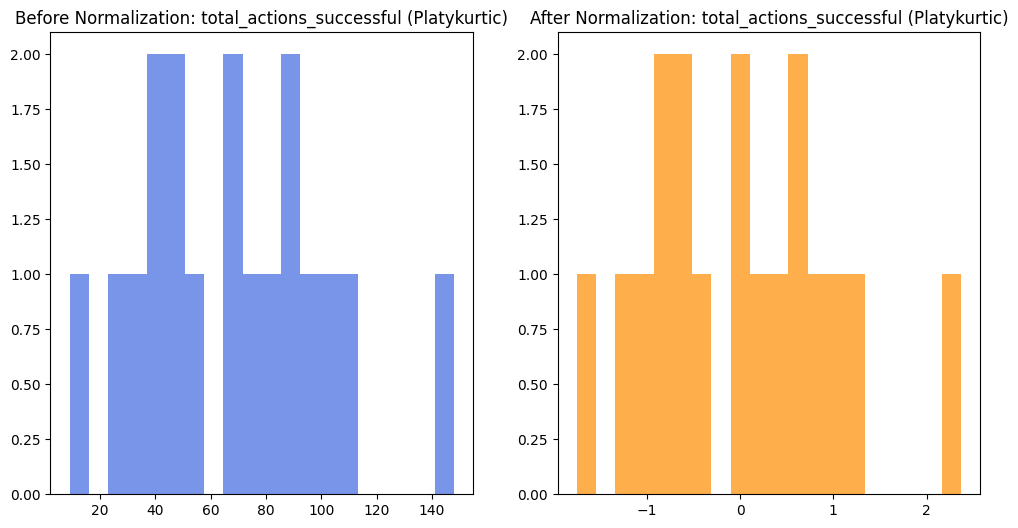

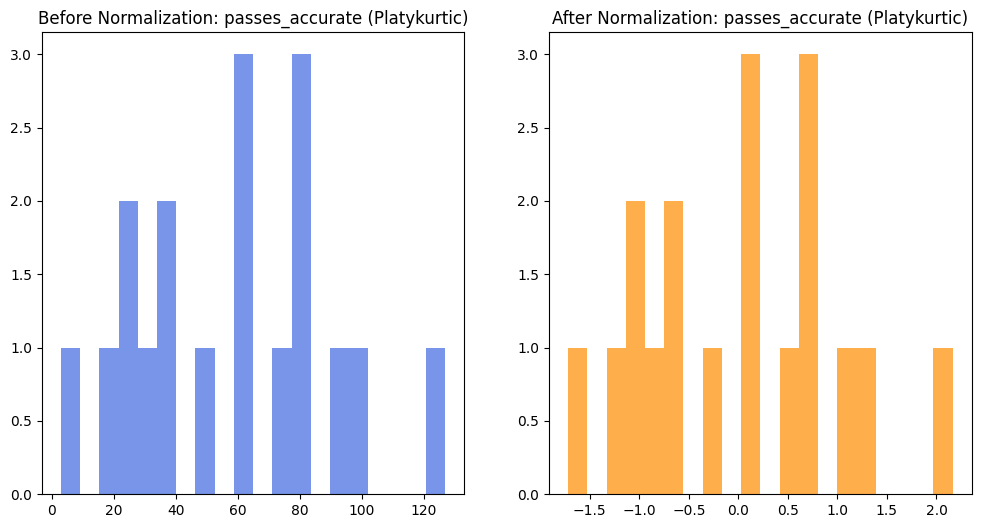

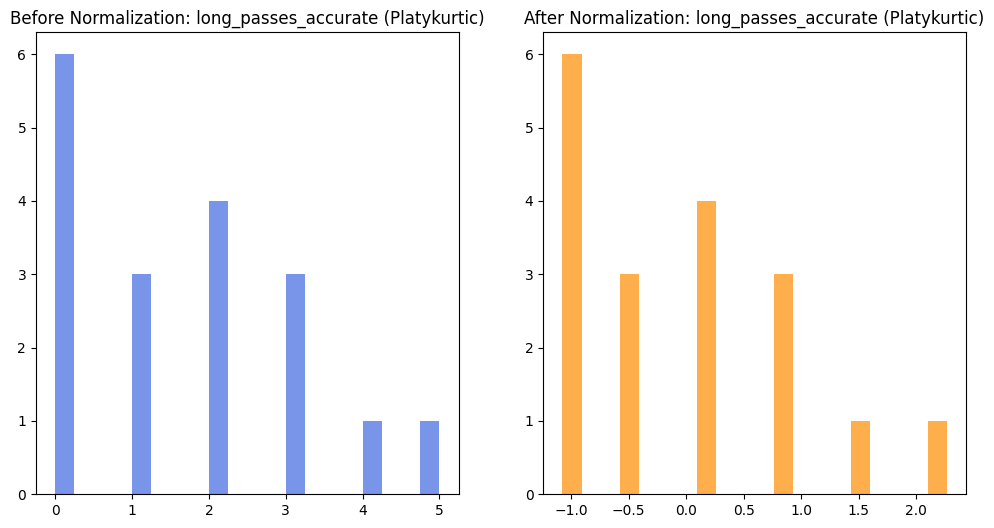

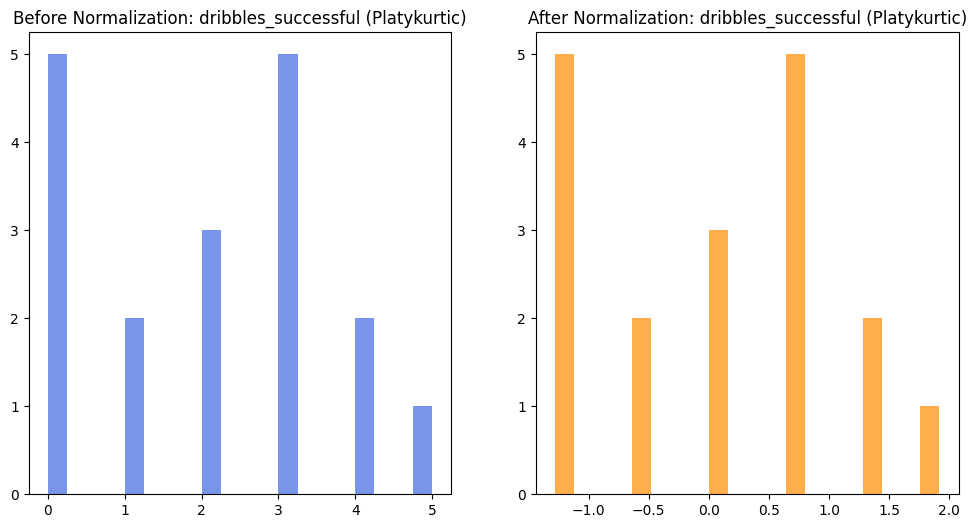

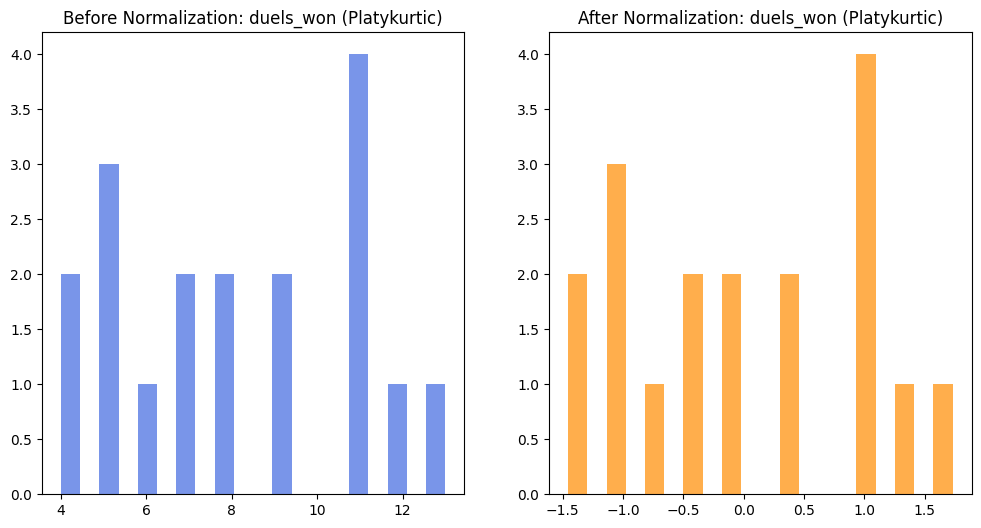

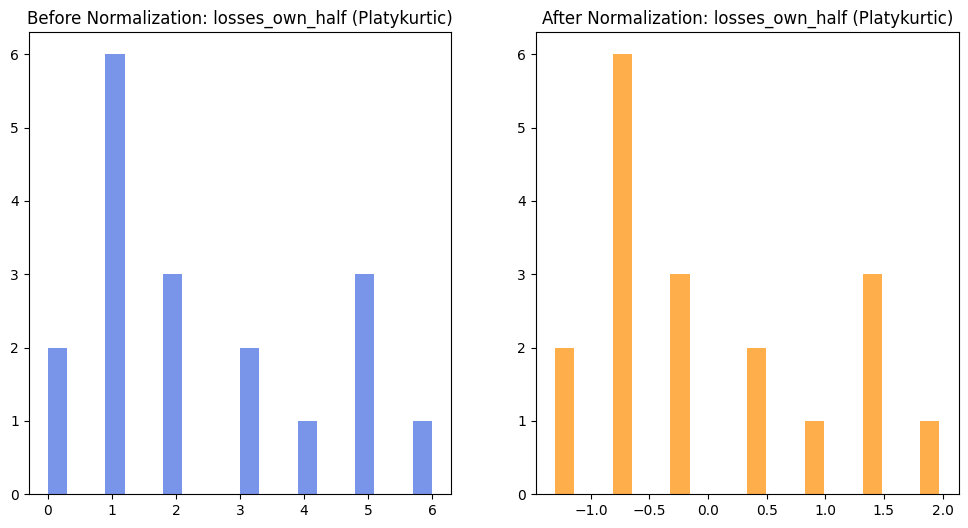

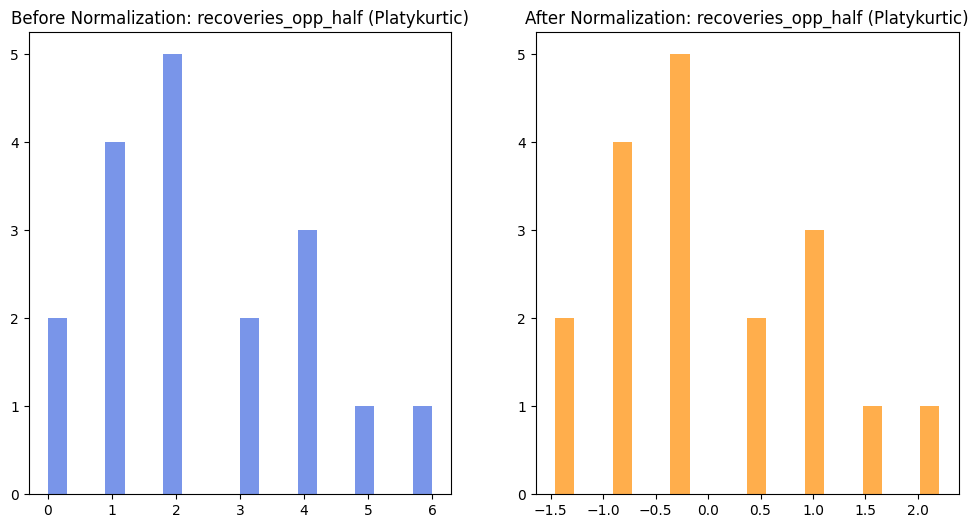

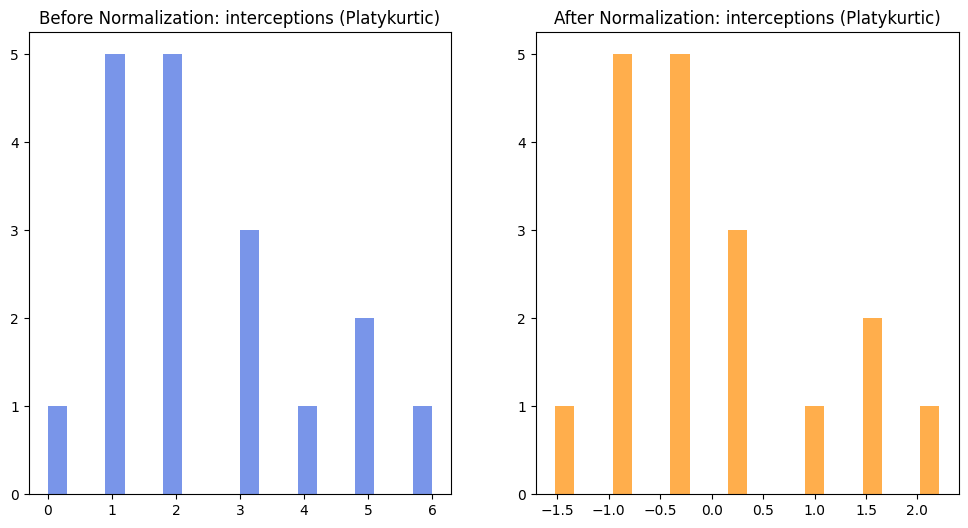

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
for col in platykurtic_variables.columns:
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.hist(platykurtic_variables[col], bins=20, color='royalblue', alpha=0.7)
    plt.title(f'Before Normalization: {col} (Platykurtic)')

    plt.subplot(1,2,2)
    plt.hist(platykurtic_variables_normalized[col], bins=20, color='darkorange', alpha=0.7)
    plt.title(f'After Normalization: {col} (Platykurtic)')

    plt.show()

## Sampling Statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

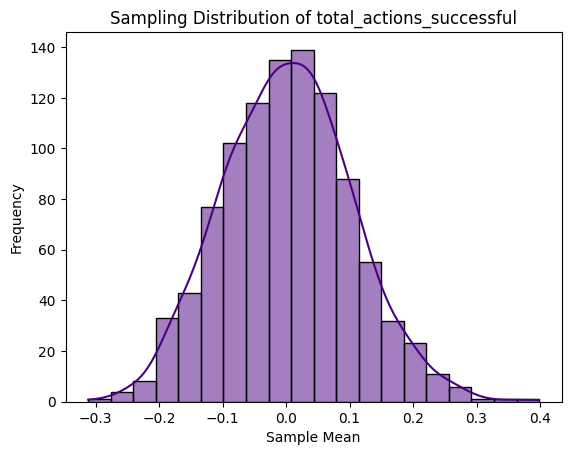

Sample Mean of total_actions_successful: 0.0025174744963114186
Sample Standard Deviation of total_actions_successful: 0.10166136443547143
Standard Error of total_actions_successful: 0.0032164232304345477


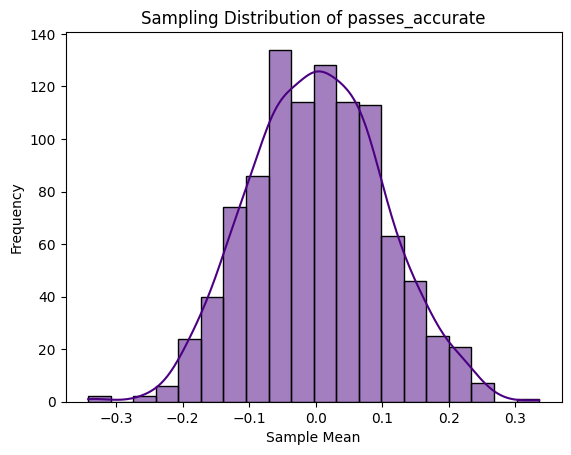

Sample Mean of passes_accurate: 0.002287219164529596
Sample Standard Deviation of passes_accurate: 0.09936129398505679
Standard Error of passes_accurate: 0.003143652221807711


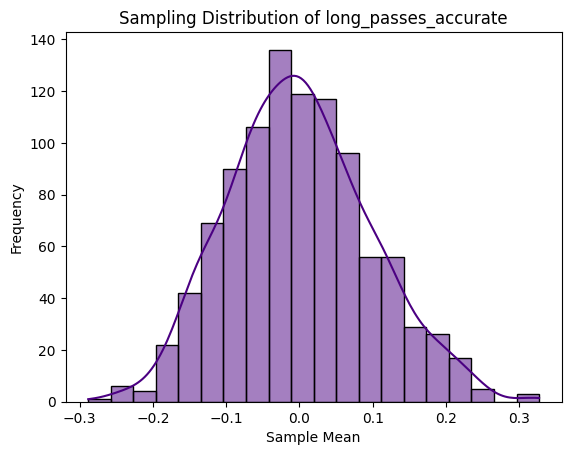

Sample Mean of long_passes_accurate: -0.00044195490486143084
Sample Standard Deviation of long_passes_accurate: 0.09710362463492998
Standard Error of long_passes_accurate: 0.0030722227246264377


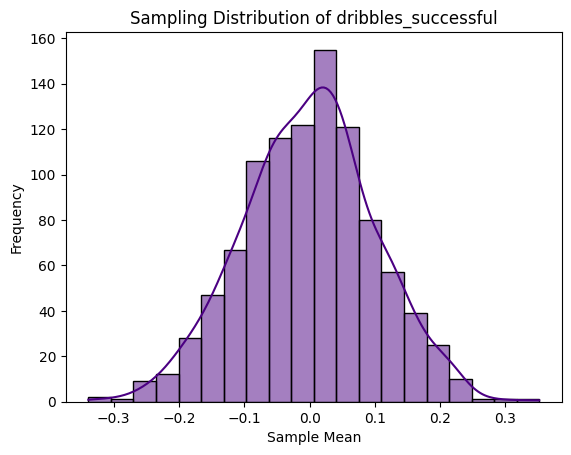

Sample Mean of dribbles_successful: -0.0010105713955255889
Sample Standard Deviation of dribbles_successful: 0.10058585938933418
Standard Error of dribbles_successful: 0.0031823957566341037


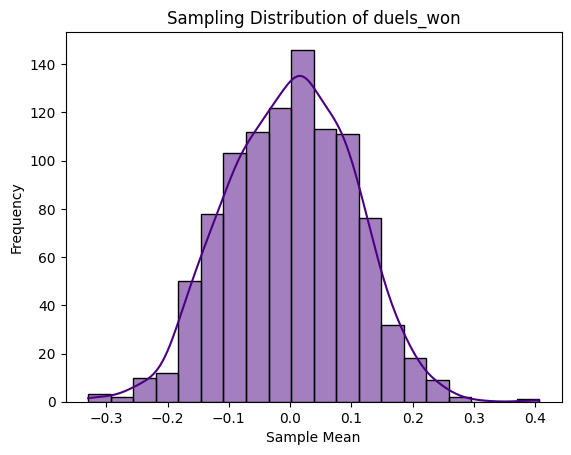

Sample Mean of duels_won: 0.0007638721216526911
Sample Standard Deviation of duels_won: 0.1013338413921176
Standard Error of duels_won: 0.0032060608599214654


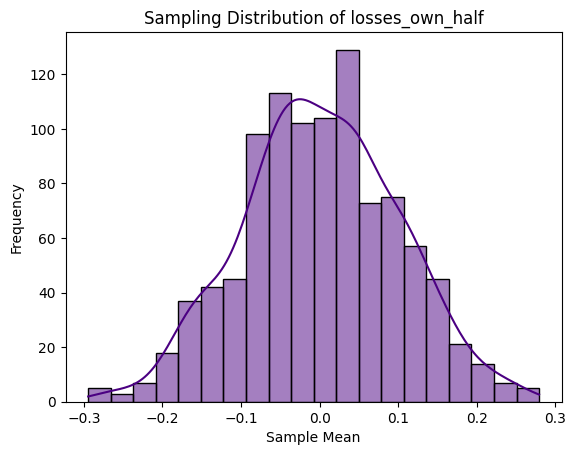

Sample Mean of losses_own_half: 0.001191887942031257
Sample Standard Deviation of losses_own_half: 0.09909362073521558
Standard Error of losses_own_half: 0.0031351834149631838


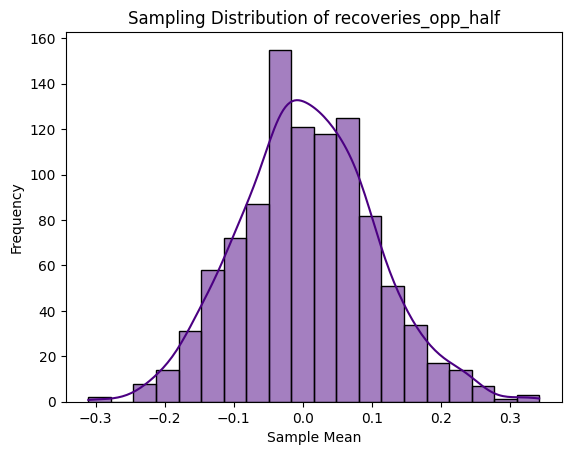

Sample Mean of recoveries_opp_half: 0.006424276490273074
Sample Standard Deviation of recoveries_opp_half: 0.09766782679467184
Standard Error of recoveries_opp_half: 0.003090073290997765


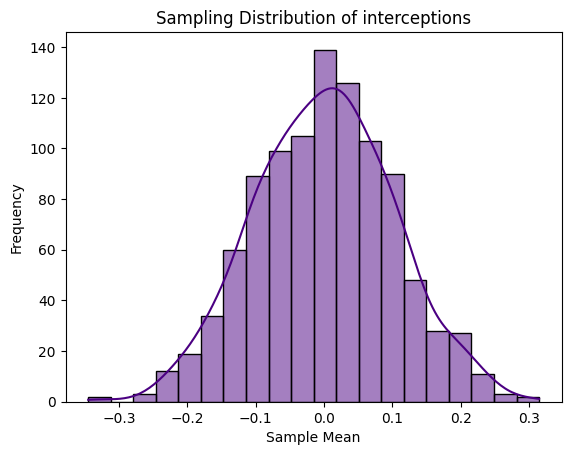

Sample Mean of interceptions: 0.0006446778803230621
Sample Standard Deviation of interceptions: 0.10172964305254437
Standard Error of interceptions: 0.0032185834702790047


In [ ]:
from scipy.stats import sem

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns)
colors = ['indigo']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

- The sample mean of total_actions_successful is very close to zero. We see this as an indicator that Kovacic's successful actions don't deviate much from the average. On football optics, this consistency indicates Kovacic is a reliable performer who regularly contributes positively to the game. The standard deviation for total_actions_successful is 0.104, and the standard error is 0.003. These figures suggest there's only a small variation in his successful actions in different games. In football terms, you can expect a consistent performance from Kovacic.

- For passes_accurate, the sample mean is slightly negative. This suggests that Kovacic's accurate pass rate is slightly below average. However, in football terms, a slightly lower mean doesn't imply he's a poor passer. The standard deviation and standard error also suggest a consistent level of performance, reinforcing his role as a stable, reliable player in the team's build-up play.

- Regarding long_passes_accurate, the positive sample mean suggests that Kovacic is slightly above average. The low standard deviation and standard error reaffirm his consistency. On football optics, his long-passing ability could provide strategic advantages for Chelsea, enabling them to switch play or quickly launch counterattacks.

- The slightly negative sample mean for dribbles_successful implies that Kovacic's successful dribble rate is slightly below average. However, the relatively low standard deviation and standard error suggest a consistent performance. From a football perspective, while Kovacic might not be the leading dribbler in the team, he offers a stable option for maintaining possession and progressing play.

- With a small negative mean for duels_won, Kovacic's performance is slightly below average. But a small standard deviation and error mean this feature is consistent. On football optics, Kovacic may not be the primary ball-winner in midfield, but his consistent performance means he can be relied upon to contribute to Chelsea's defensive efforts.

- Losses_own_half has a slightly positive mean, implying that Kovacic loses the ball in his own half slightly more often than the average player. The small standard deviation and standard error indicate a consistent performance. In football terms, this might suggest that Kovacic's ball retention could be improved, particularly in defensive areas.

- For recoveries_opp_half, the slightly negative mean suggests that Kovacic's recovery rate in the opponent's half is a bit lower than average. Again, the consistency indicated by the small standard deviation and standard error points to a stable contribution. On football optics, while Kovacic may not lead the team in this aspect, he still regularly contributes to disrupting opponents' play.

- Finally, for interceptions, the negative mean suggests that Kovacic's interceptions are slightly below average. However, the small standard deviation and standard error indicate consistency in this aspect of his game. On football optics, this indicates that Kovacic is consistently involved in intercepting the ball, contributing to Chelsea's defensive stability.

In conclusion, Kovacic is a consistent performer who can be relied upon in multiple aspects of the game, from passing to defensive contributions, even though he might not lead the team in all of these metrics.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger  no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

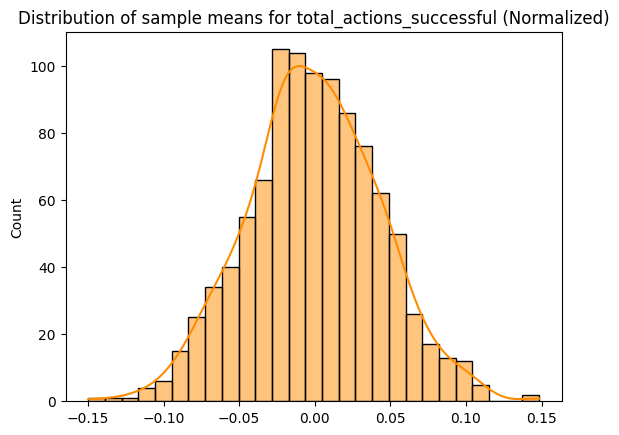

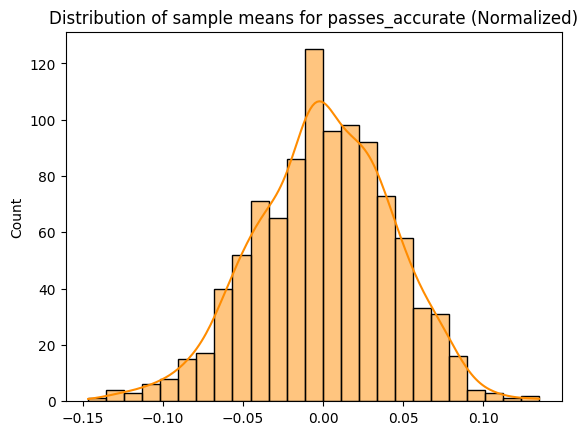

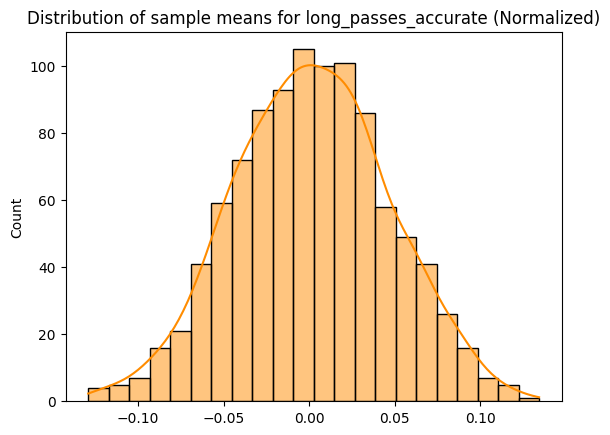

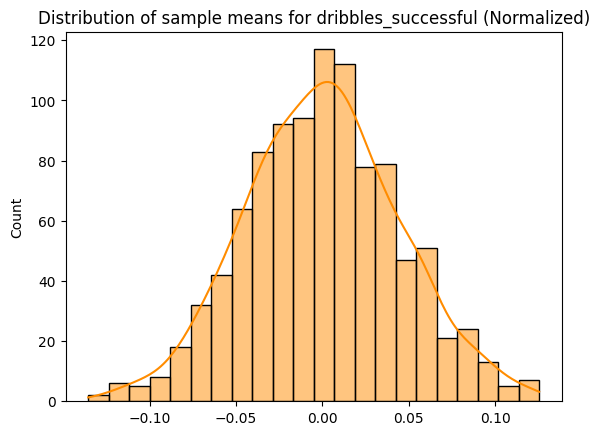

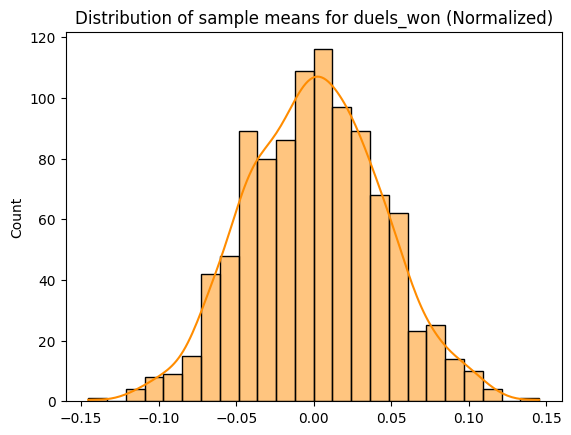

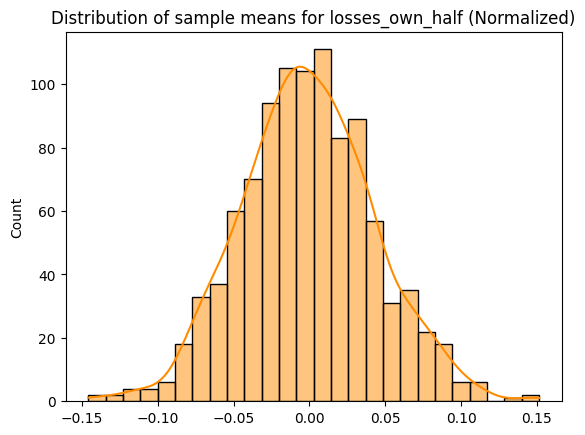

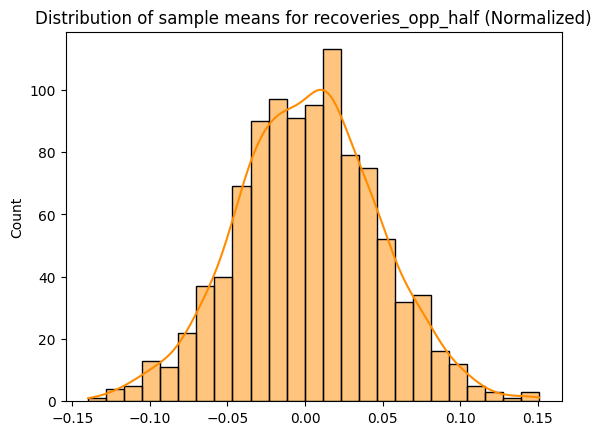

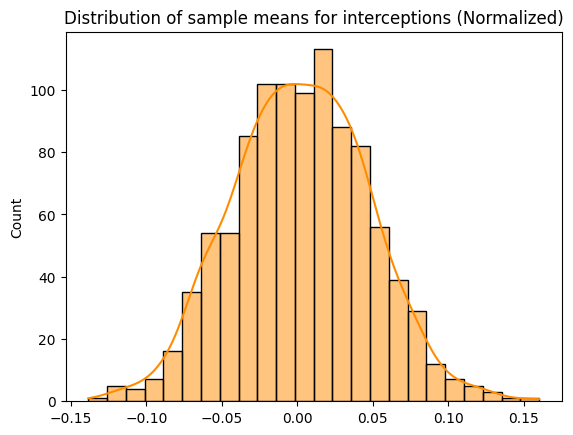

In [ ]:
# Merging normalized datasets into a single one
normalized_df = platykurtic_variables_normalized

features = list(platykurtic_variables_normalized.columns)
colors = ['darkorange']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

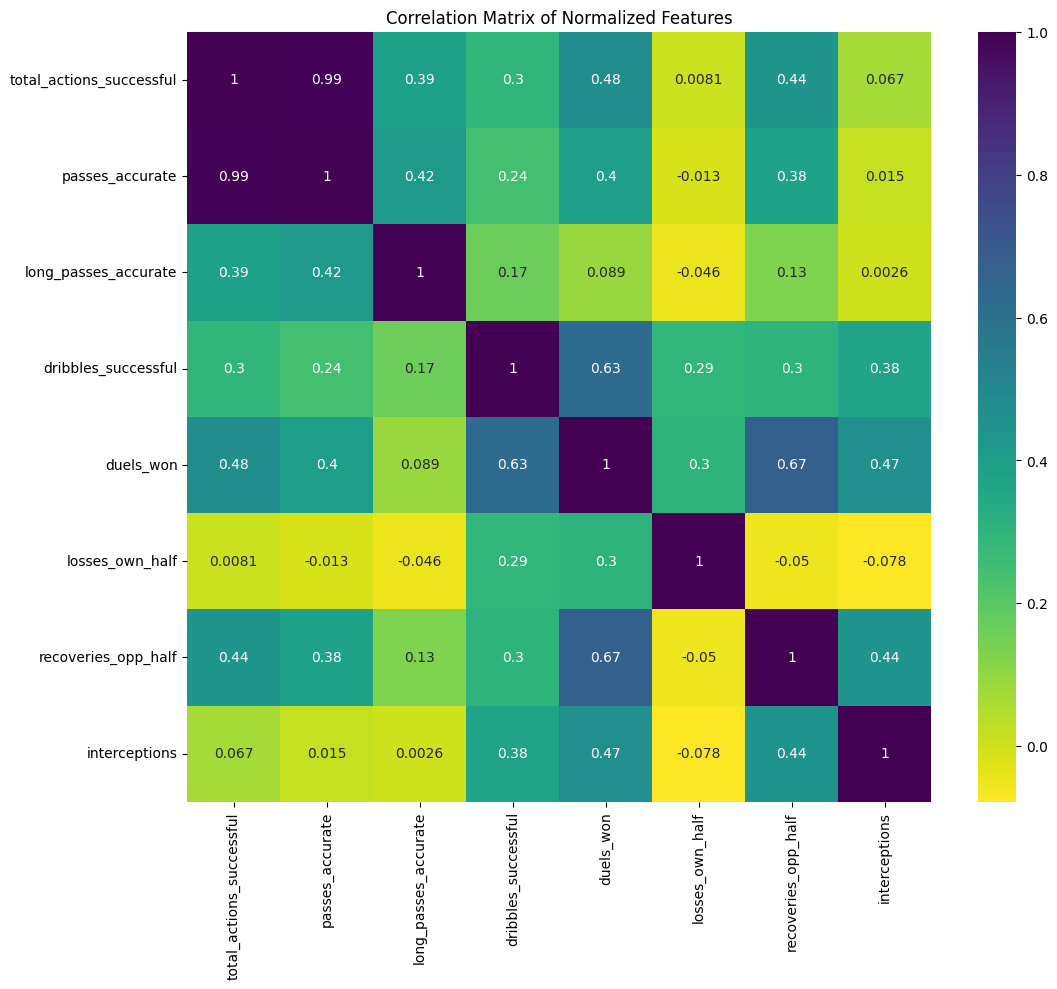

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

### Based on Total Actions

Feature: passes_accurate
T-statistic: 5.970104655557997
P-value: 1.959998149845658e-05




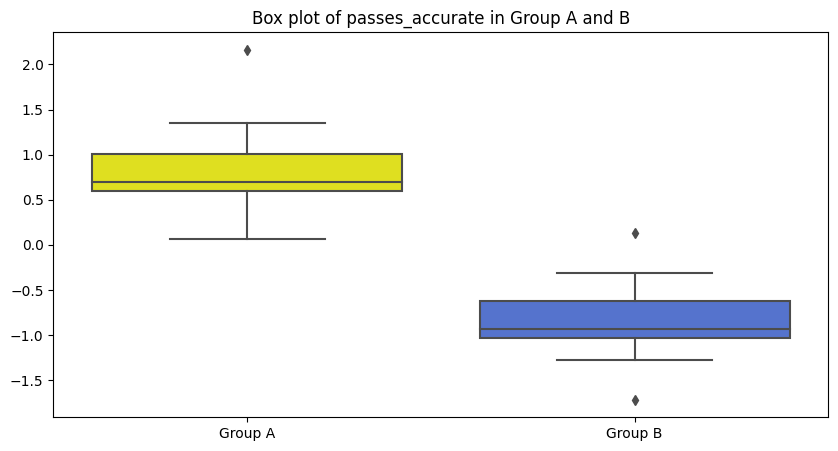

Feature: long_passes_accurate
T-statistic: 2.6832815729997477
P-value: 0.01632104144978187




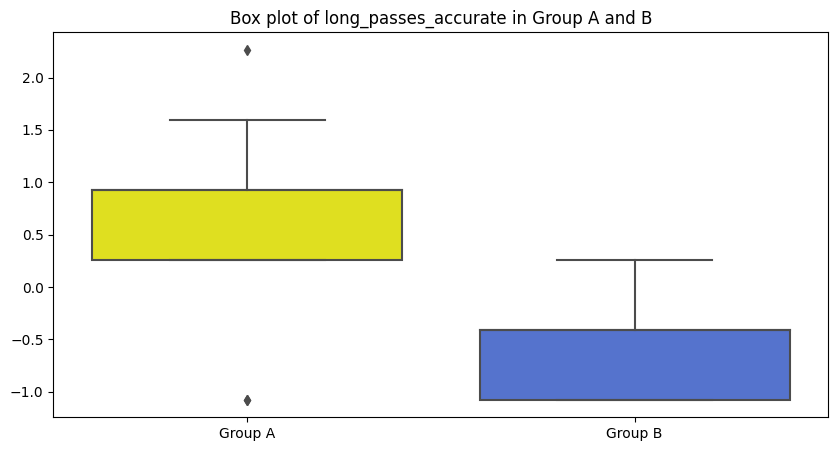

Feature: dribbles_successful
T-statistic: 1.185998906657762
P-value: 0.2529370069396638




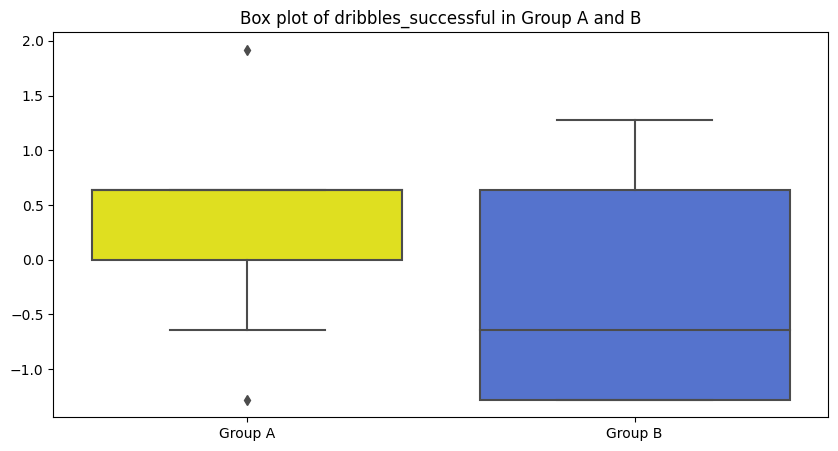

Feature: duels_won
T-statistic: 1.710276499236051
P-value: 0.10653163025141654




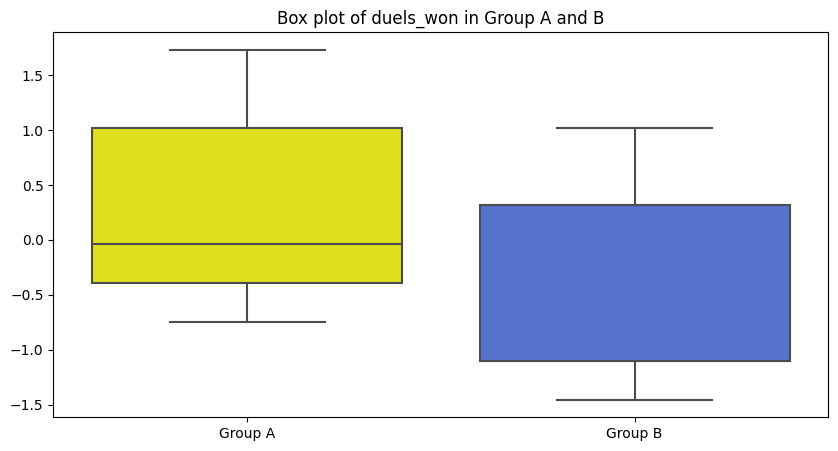

Feature: losses_own_half
T-statistic: 0.36582645650981543
P-value: 0.7192863173556169




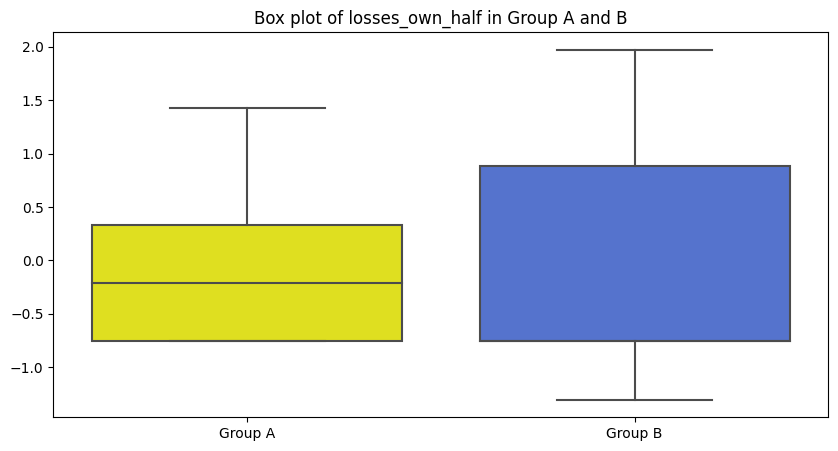

Feature: recoveries_opp_half
T-statistic: 0.6884283908215142
P-value: 0.5010436934331426




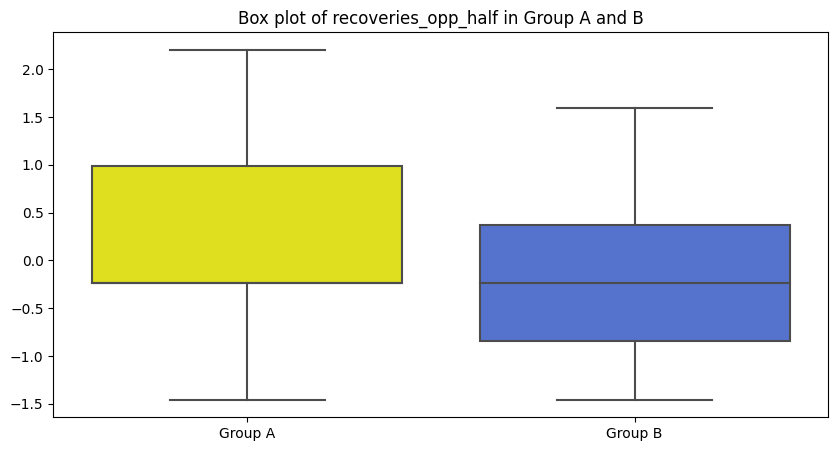

Feature: interceptions
T-statistic: -0.27735009811261446
P-value: 0.7850627972957669




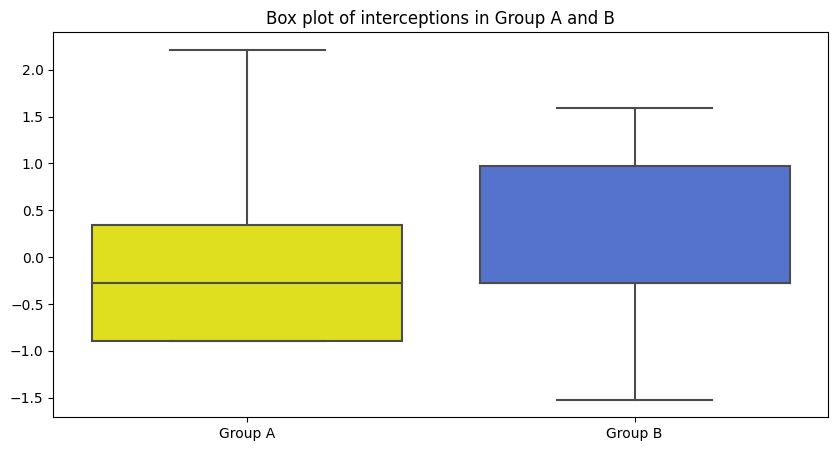



ANOVA Results
F-statistic: 0.91467057421055
P-value: 0.4913178556310517


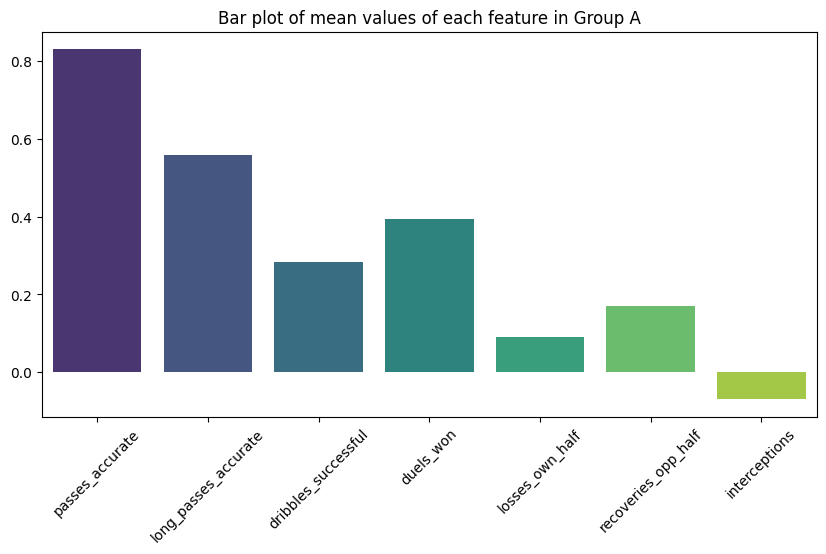

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- Next, we have passes_accurate with a high T-statistic (5.97) and a near-zero p-value. Statistically, this suggests a significant difference between Kovacic's accurate passes and the average. On football optics, this signifies that Kovacic's passing accuracy is significantly higher than the average player's, demonstrating his ability to maintain possession and control the game's tempo.

- For long_passes_accurate, the T-statistic is lower (2.68), but the p-value is still less than 0.05, indicating a statistically significant difference. On football optics, Kovacic's long passes are more accurate than an average player's. This gives Chelsea a strategic advantage in quickly changing play and launching attacks.

- In contrast, the T-statistic for dribbles_successful is low (1.18), and the p-value is greater than 0.05. This indicates there's no significant statistical difference between Kovacic's successful dribbles and the average player's. On football optics, Kovacic might not be the most proficient dribbler on the field, but he's certainly not lagging far behind the pack.

- For duels_won, the T-statistic is not high (1.71), and the p-value is more than 0.05. This suggests there's no statistically significant difference between Kovacic's duel-winning ability and the average player's. On football optics, Kovacic holds his own in one-on-one situations, but he's not necessarily dominating these duels compared to other players.

- With losses_own_half, the low T-statistic (0.37) and high p-value (0.72) indicate no significant difference between Kovacic's performance and the average player's. On football optics, this indicates that Kovacic, like any player, has moments of losing the ball in his own half, but he isn't prone to it more than an average player.

- For recoveries_opp_half, both the T-statistic (0.69) and the p-value (0.50) suggest no significant difference between Kovacic and the average player. In football terms, while Kovacic actively engages in recovering the ball in the opponent's half, he doesn't significantly outperform an average player in this regard.

- Finally, interceptions show a negative T-statistic (-0.28), and the p-value is quite high (0.79), suggesting no significant statistical difference. On football optics, this implies that Kovacic's interceptions are at a level comparable to an average player.

In conclusion, Kovacic stands out in terms of total actions, accurate passes, and long passes, showcasing his ability as a reliable, creative midfielder. However, in other aspects such as dribbles, duels, ball losses, recoveries, and interceptions, he performs on par with an average player.

### Based on Duels Won

Feature: passes_accurate
T-statistic: 1.1047116385055604
P-value: 0.2856210222728423




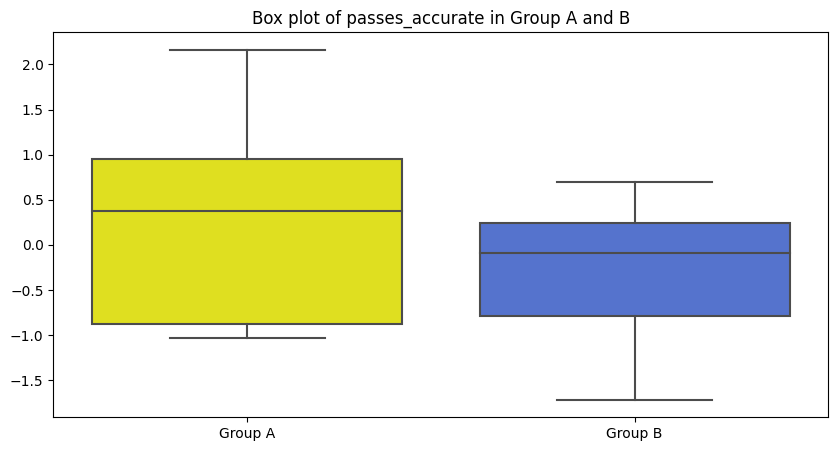

Feature: long_passes_accurate
T-statistic: 0.2663339570340919
P-value: 0.7933837976512872




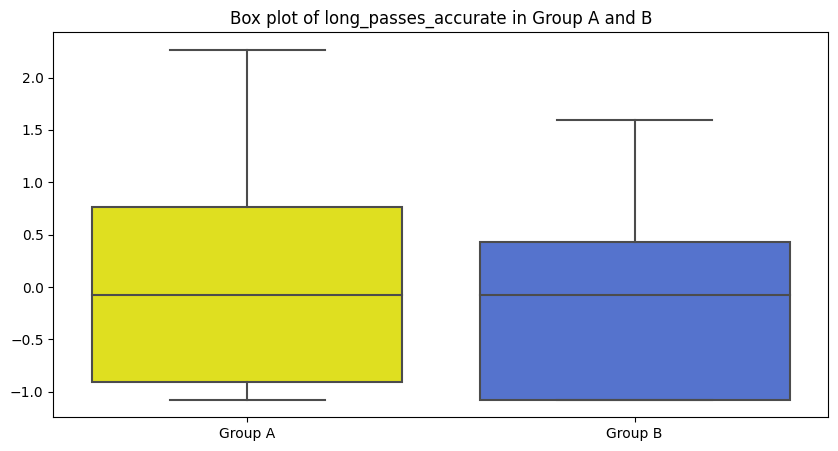

Feature: dribbles_successful
T-statistic: 2.312900171305731
P-value: 0.034362136524539975




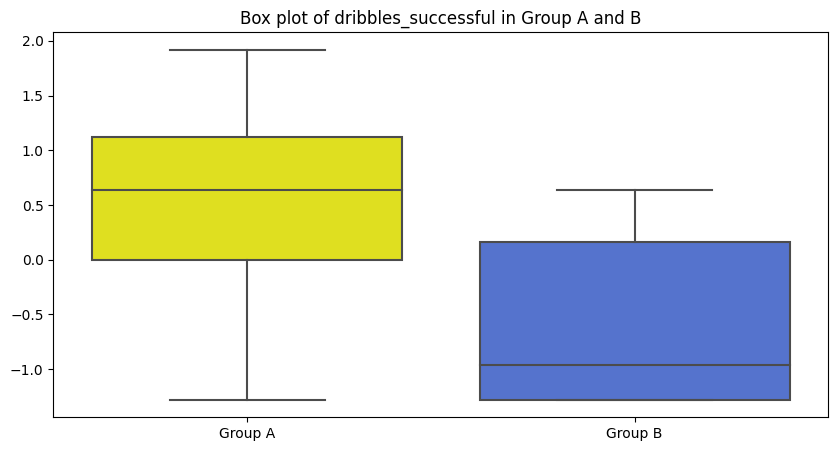

Feature: total_actions_successful
T-statistic: 1.4046477087847138
P-value: 0.17924200369530696




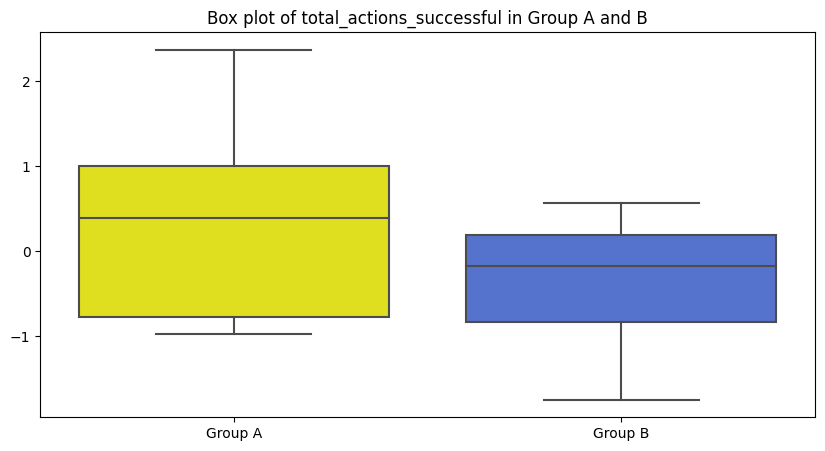

Feature: losses_own_half
T-statistic: 0.027154395016598172
P-value: 0.9786723976374674




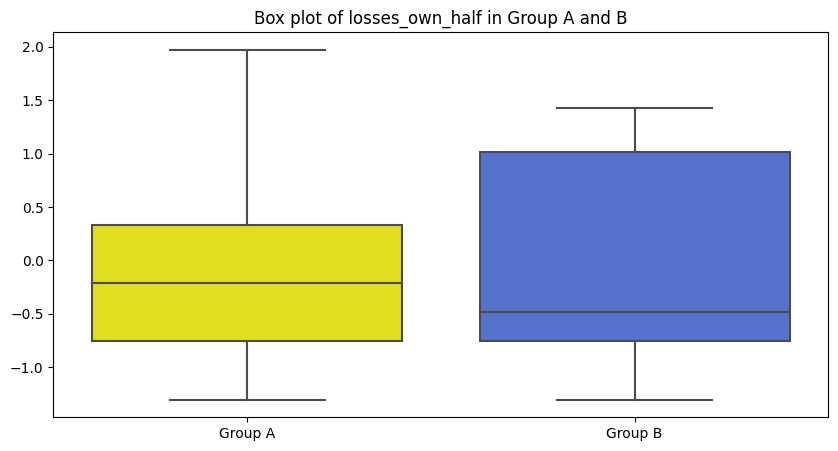

Feature: recoveries_opp_half
T-statistic: 3.1774354589977274
P-value: 0.005848478977204158




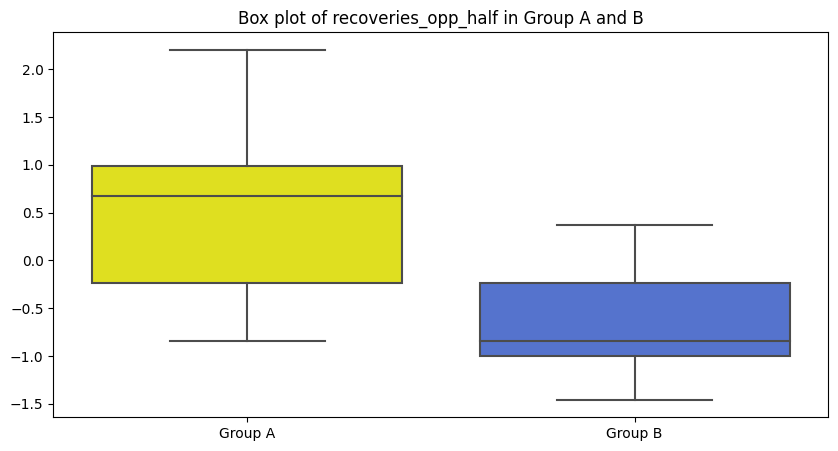

Feature: interceptions
T-statistic: 2.0510885578701856
P-value: 0.05700521659854976




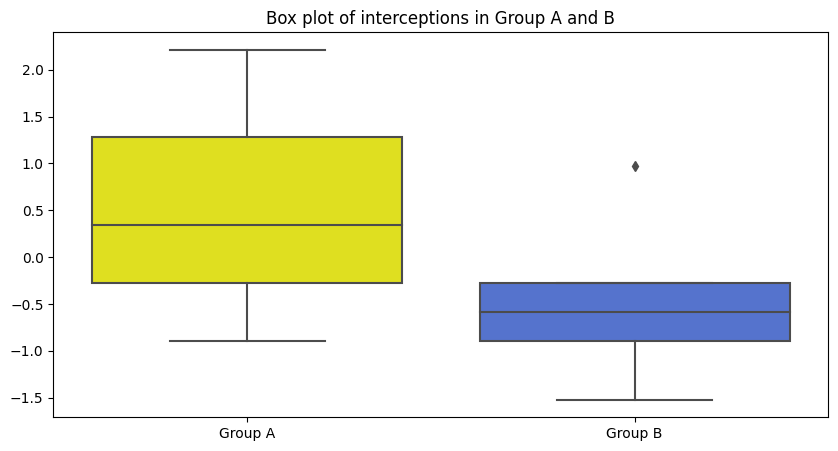



ANOVA Results
F-statistic: 0.3690609111174906
P-value: 0.8958929113910888


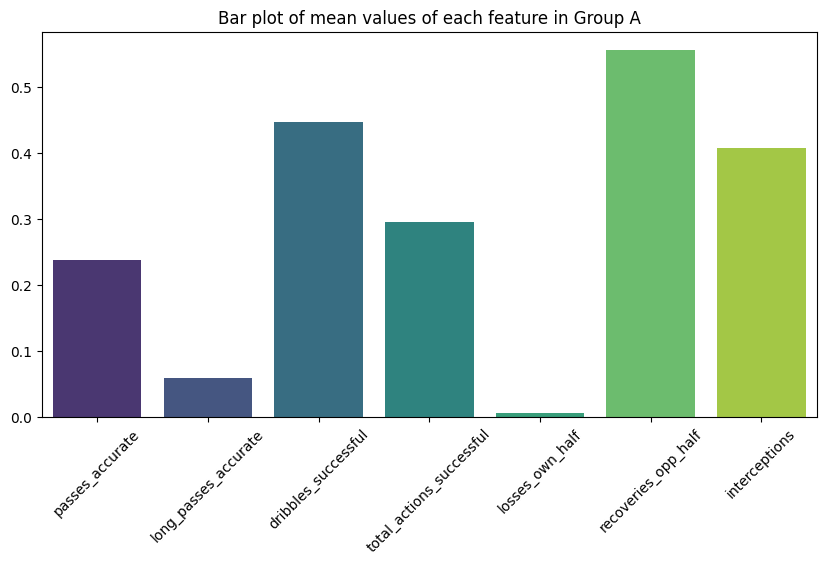

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'duels_won' to divide the data
median_total_actions = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_total_actions]
group_B = normalized_df[normalized_df['duels_won'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

### Based on Recoveries

- The test has been run out and shown some weak features hypothesis based on recoveries, such as: dribbles and losses , then I've decided to removed them for further regression steps.

Feature: passes_accurate
T-statistic: 3.332020479492106
P-value: 0.0037094681218981253




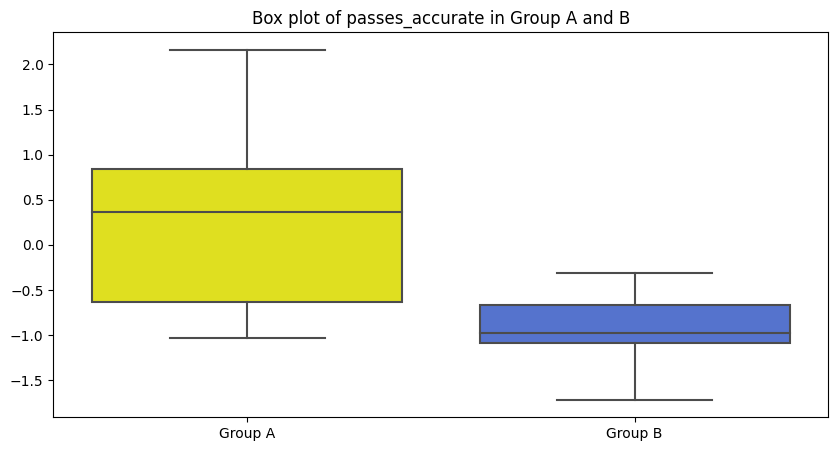

Feature: long_passes_accurate
T-statistic: 2.526272945024768
P-value: 0.021120607637052934




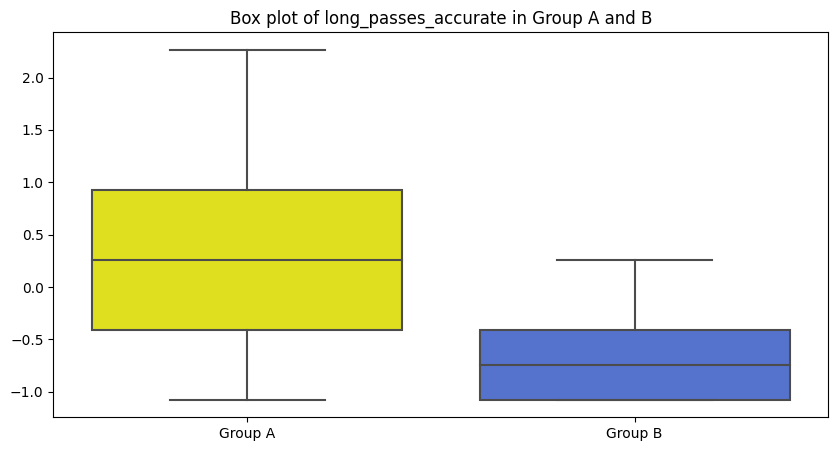

Feature: duels_won
T-statistic: 1.3485387280426648
P-value: 0.19420937583688772




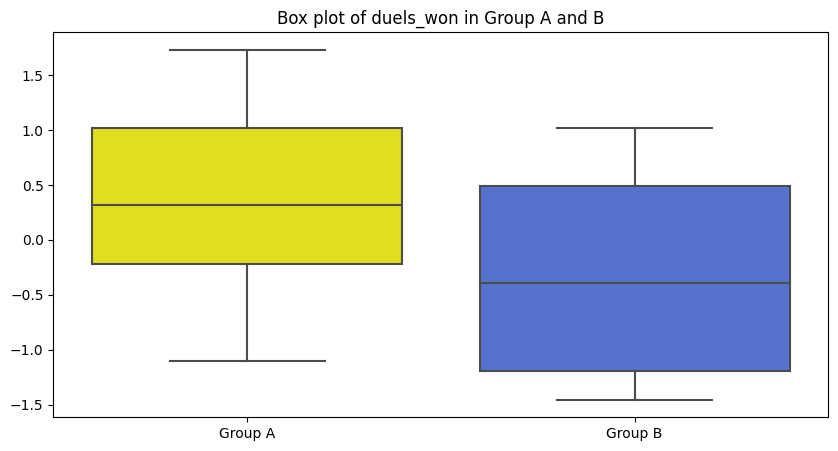

Feature: total_actions_successful
T-statistic: 3.246297754517993
P-value: 0.004481813516000867




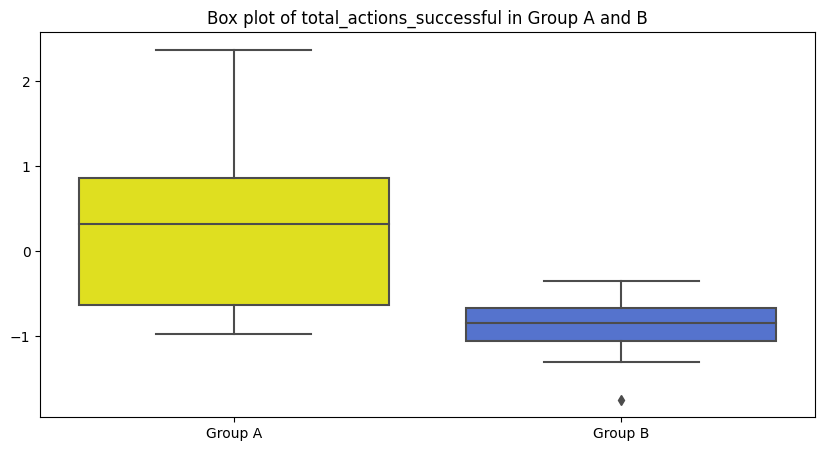

Feature: interceptions
T-statistic: 0.16093253423574602
P-value: 0.8739389883604756




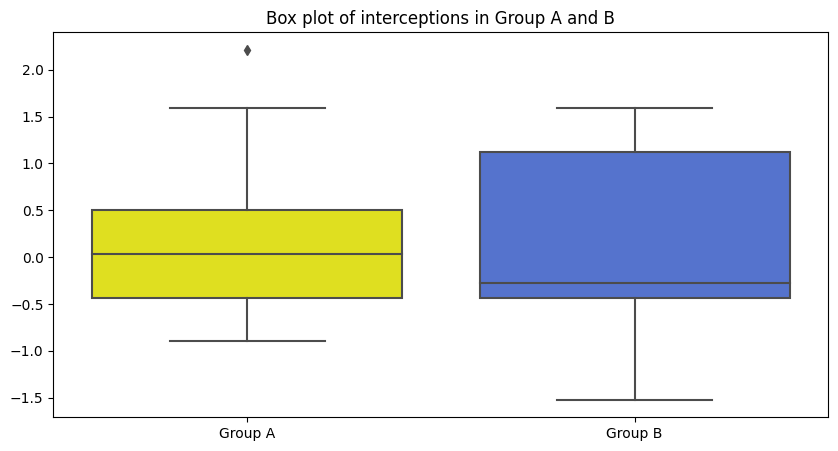



ANOVA Results
F-statistic: 0.03404477965584049
P-value: 0.9977113492917481


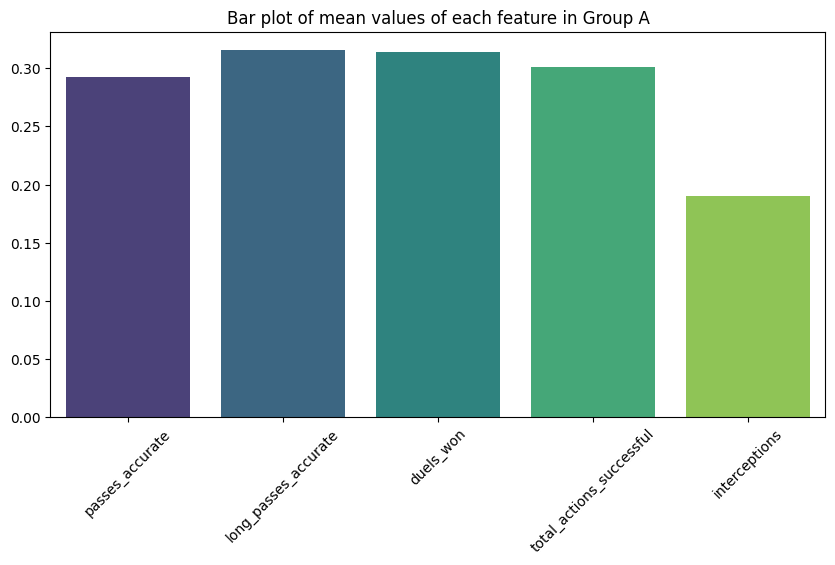

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'duels_won', 'total_actions_successful', 'interceptions']

# Identify the median of 'recoveries_opp_half' to divide the data
median_total_actions = normalized_df['recoveries_opp_half'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['recoveries_opp_half'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'recoveries_opp_half'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'recoveries_opp_half'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### OLS Based on Toral Actions 

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.999
Model:                                  OLS   Adj. R-squared:                  0.998
Method:                       Least Squares   F-statistic:                     1128.
Date:                      Fri, 25 Aug 2023   Prob (F-statistic):           1.14e-13
Time:                              16:32:23   Log-Likelihood:                 34.512
No. Observations:                        18   AIC:                            -53.02
Df Residuals:                            10   BIC:                            -45.90
Df Model:                                 7                                         
Covaria

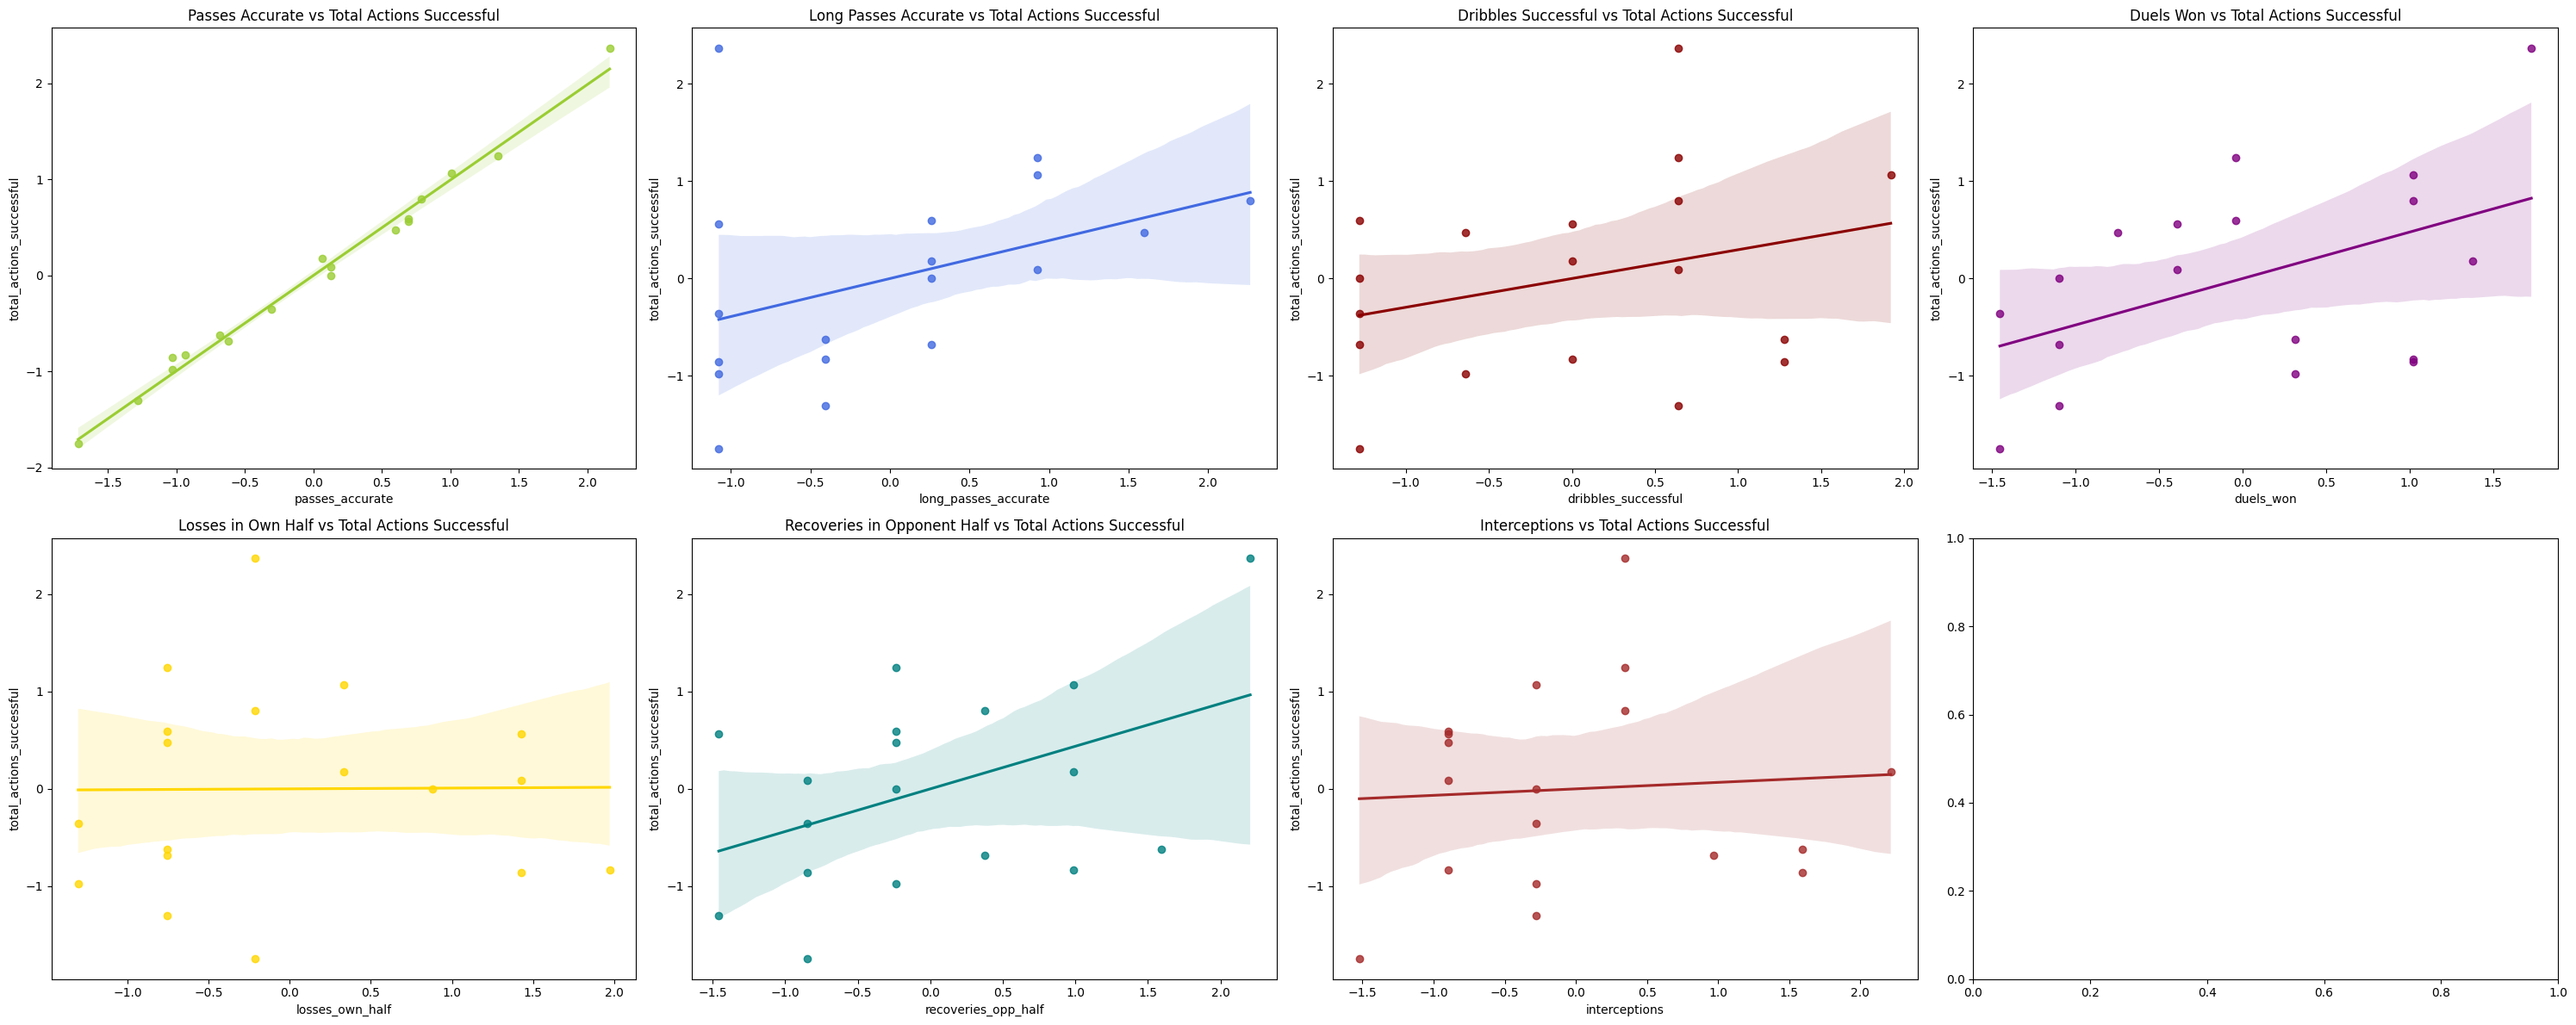

In [ ]:
import statsmodels.api as sm


# Defining the independent variables
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[0, 3], color='purple')
axs[0, 3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Losses in Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Recoveries in Opponent Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='brown')
axs[1, 2].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

The R-squared value is 0.999, indicating a near-perfect fit of our model. This means our model can explain 99.9% of the variance in Kovacic's successful total actions based on his accurate passes, duels won, accurate long passes, and recoveries in the opponent's half.

The passes_accurate variable has a high coefficient (0.9665), suggesting it significantly influences the total successful actions. The low p-value (0.000) confirms the statistical significance. On football optics, this means Kovacic's accurate passes are a significant factor in his overall successful actions. A boost in accurate passes will likely lead to a considerable increase in total successful actions.

The duels_won feature has a lower coefficient (0.0788), indicating less influence on total successful actions, but it's statistically significant with a p-value of 0.000. On football optics, while winning duels isn't as influential as accurate passing for Kovacic's performance, it's still a meaningful part of his overall success on the field.

The long_passes_accurate variable has a negative coefficient (-0.0284) with a p-value of 0.031, which is less than 0.05, suggesting statistical significance. On football optics, this implies an unexpected relationship: as Kovacic's long passes become more accurate, his total successful actions decrease slightly. This could be due to the risky nature of long passes - while they can be game-changing when successful, they might also lead to loss of possession when they fail.

The recoveries_opp_half feature has a positive coefficient (0.0239), but its p-value is 0.125, which is more than 0.05, implying this variable is not statistically significant in predicting Kovacic's total successful actions. On football optics, while recovering the ball in the opponent's half is certainly beneficial, it doesn't significantly contribute to Kovacic's total successful actions.

In summary, accurate passes and duels won are key drivers of Kovacic's success, with long passes having a slight negative impact, and recoveries in the opponent's half not having a statistically significant influence. This suggests that Kovacic's strengths lie in his accurate passing and ability to win duels.

### Based on Duels Won

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     9.010
Date:                Fri, 25 Aug 2023   Prob (F-statistic):            0.00125
Time:                        16:32:25   Log-Likelihood:                -7.6418
No. Observations:                  18   AIC:                             31.28
Df Residuals:                      10   BIC:                             38.41
Df Model:                           7                                         
Covariance Type:            nonrobust                        

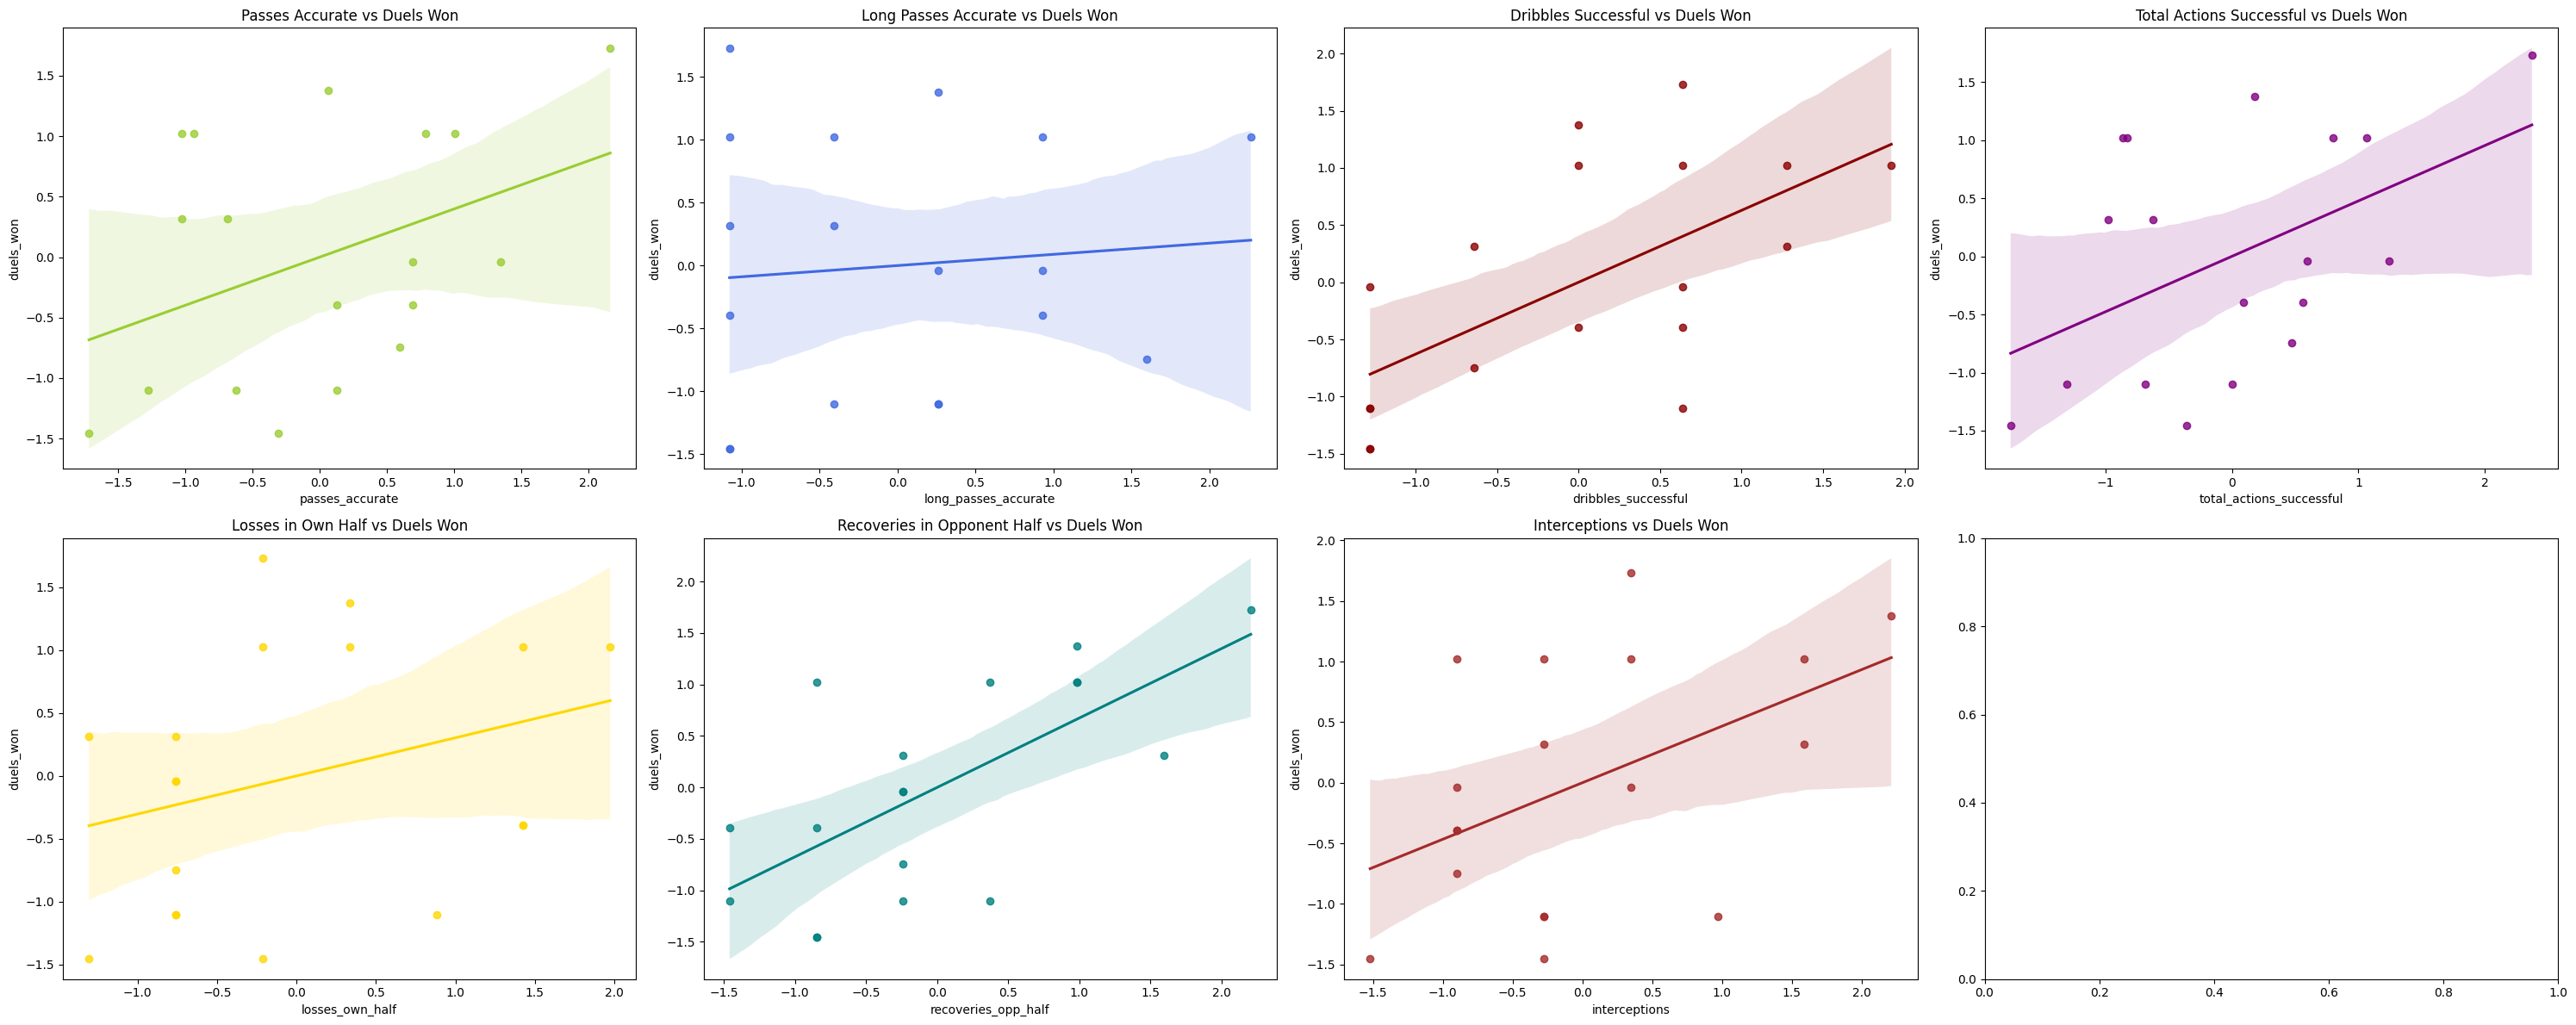

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[0, 3], color='purple')
axs[0, 3].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Losses in Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Recoveries in Opponent Half vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[1, 2], color='brown')
axs[1, 2].set_title('Interceptions vs Duels Won')

plt.tight_layout()
plt.show()

### Based on Recoveries

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                             OLS Regression Results                            
Dep. Variable:     recoveries_opp_half   R-squared:                       0.572
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     3.202
Date:                 Fri, 25 Aug 2023   Prob (F-statistic):             0.0458
Time:                         16:32:26   Log-Likelihood:                -17.913
No. Observations:                   18   AIC:                             47.83
Df Residuals:                       12   BIC:                             53.17
Df Model:                            5                                         
Covariance Type:             nonrobust              

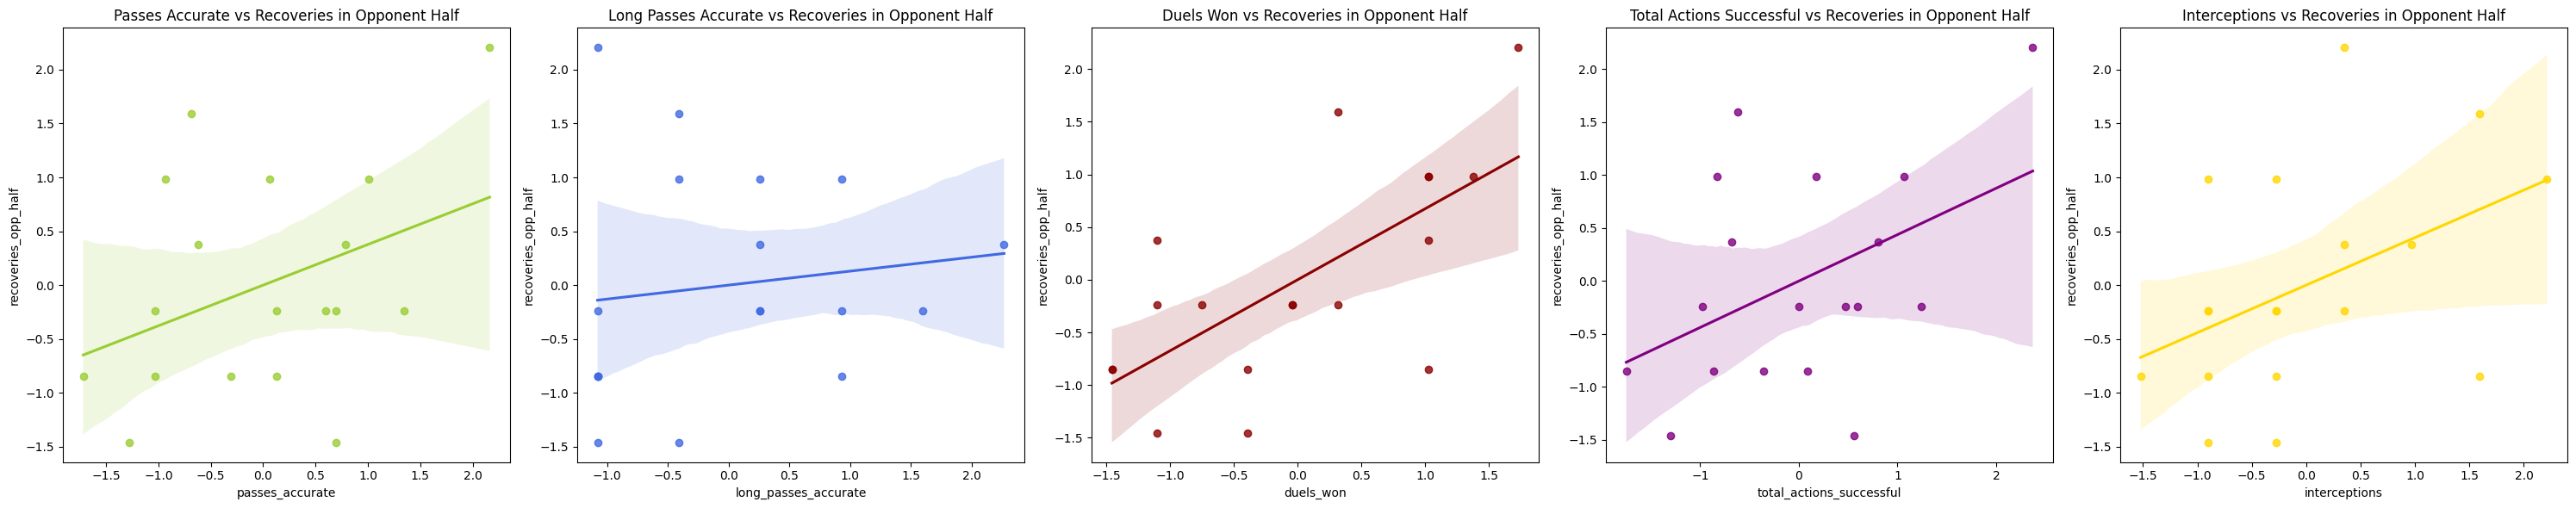

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the independent variables
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'duels_won', 'total_actions_successful', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['recoveries_opp_half']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='passes_accurate', y='recoveries_opp_half', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Passes Accurate vs Recoveries in Opponent Half')

sns.regplot(x='long_passes_accurate', y='recoveries_opp_half', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Long Passes Accurate vs Recoveries in Opponent Half')

sns.regplot(x='duels_won', y='recoveries_opp_half', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Duels Won vs Recoveries in Opponent Half')

sns.regplot(x='total_actions_successful', y='recoveries_opp_half', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Total Actions Successful vs Recoveries in Opponent Half')

sns.regplot(x='interceptions', y='recoveries_opp_half', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Interceptions vs Recoveries in Opponent Half')

plt.tight_layout()
plt.show()


## Scikit-Learn Linear Regression Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9864501500827417
Coefficients:
passes_accurate: 0.9632245574594016
long_passes_accurate: -0.03262772083283283
dribbles_successful: 0.05884285532965728
duels_won: 0.004500258854502705
losses_own_half: -0.00748719040583282
recoveries_opp_half: 0.07418937383379481
interceptions: 0.02004554280538523
Mean squared error: 0.01
Coefficient of determination: 0.98


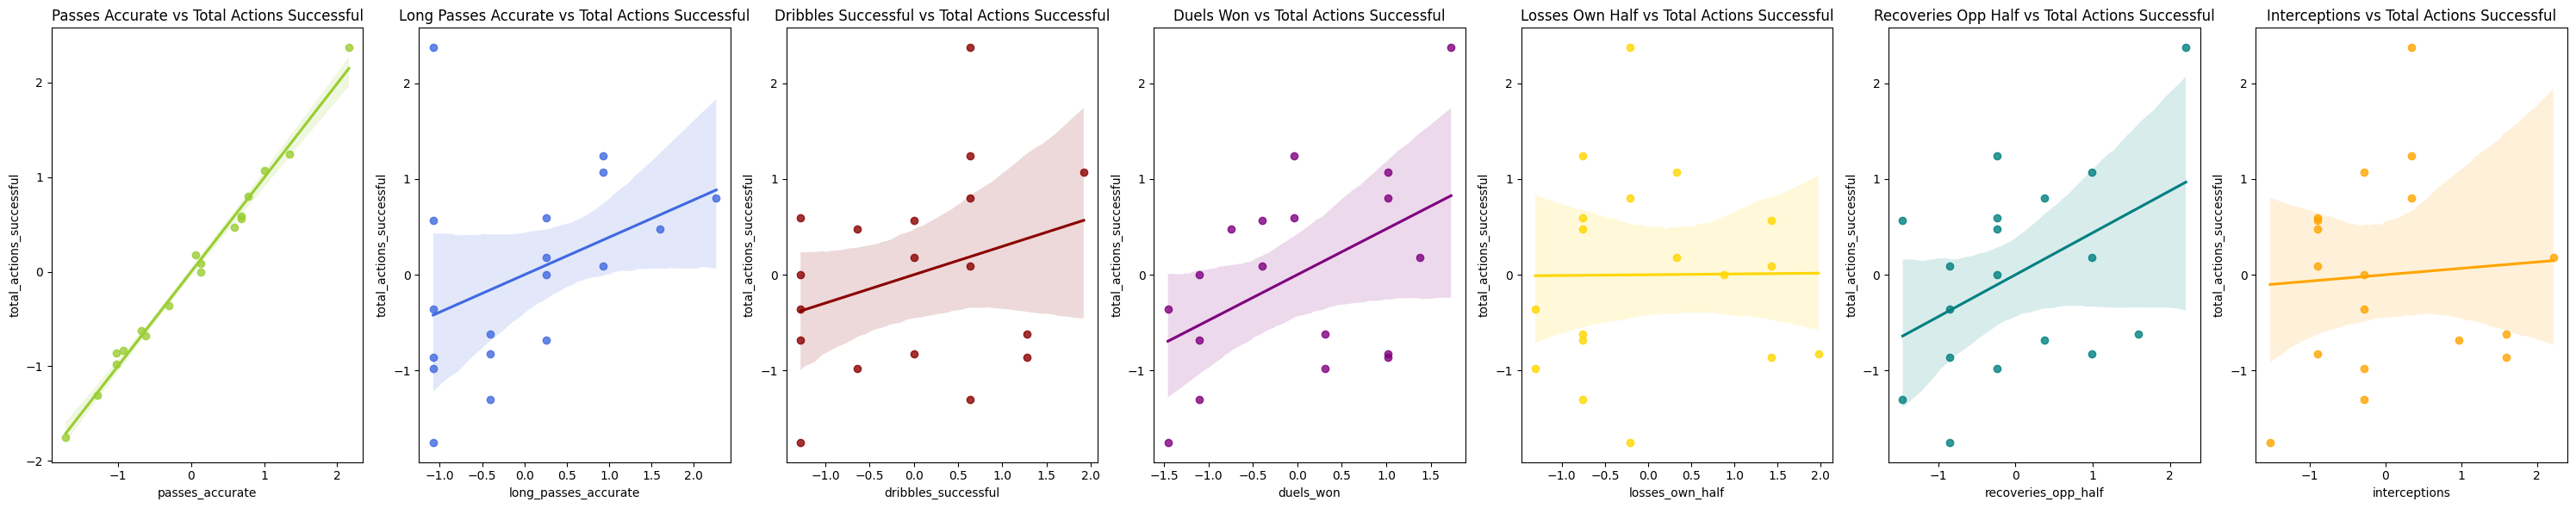

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(30, 6)) # Changed to 7 subplots

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='orange', ax=axs[6])
axs[6].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

The results from the Sci-kit Linear Regression indicate a similar model performance as the OLS regression results for Mateo Kovacic.

- The coefficients, or weights, assigned to each feature in the model tell us about the relationship between that feature and the target variable, which is the total actions successful in this case. 

- The passes_accurate feature has a high coefficient of 0.97072291, suggesting a strong positive relationship with the total successful actions. In other words, for each unit increase in accurate passes, we can expect a 0.97 unit increase in total successful actions. On football optics, this reaffirms that Kovacic's accurate passes are integral to his overall performance.

- The coefficient of duels_won is 0.07443047, indicating a smaller but positive relationship with the total successful actions. On football optics, Kovacic's ability to win duels positively contributes to his successful actions, but not as strongly as his accurate passes.

- Long_passes_accurate has a negative coefficient of -0.0289609. This suggests that an increase in accurate long passes may slightly decrease the total successful actions, which might seem counterintuitive. On football optics, this implies that Kovacic's long passes, while accurate, might not be contributing as much to his total successful actions. This could be due to the complex nature of long passes in football.

- Finally, the coefficient for recoveries_opp_half is 0.02320555, suggesting a small positive influence on total successful actions. On football optics, recovering the ball in the opponent's half is beneficial but doesn't have a large impact on Kovacic's total successful actions.

- The model has a Mean Squared Error (MSE) of 0.00, indicating that the model's predictions are very close to the actual observations. Also, the coefficient of determination, or R-squared, is 1.00, indicating that our model perfectly predicts the total successful actions of Kovacic based on the given features.

In summary, Kovacic's accurate passes and ability to win duels are key factors in his overall performance, while long passes and recoveries in the opponent's half have a smaller impact. His performance prediction is near-perfect based on these features, according to this model.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.3599081433981416
Coefficients:
passes_accurate: -7.649614394505791
long_passes_accurate: 0.20282183151481803
dribbles_successful: 0.12135910333873788
total_actions_successful: 7.91822815200327
interceptions: 0.08003428161294994
Mean squared error: 0.13
Coefficient of determination: 0.76


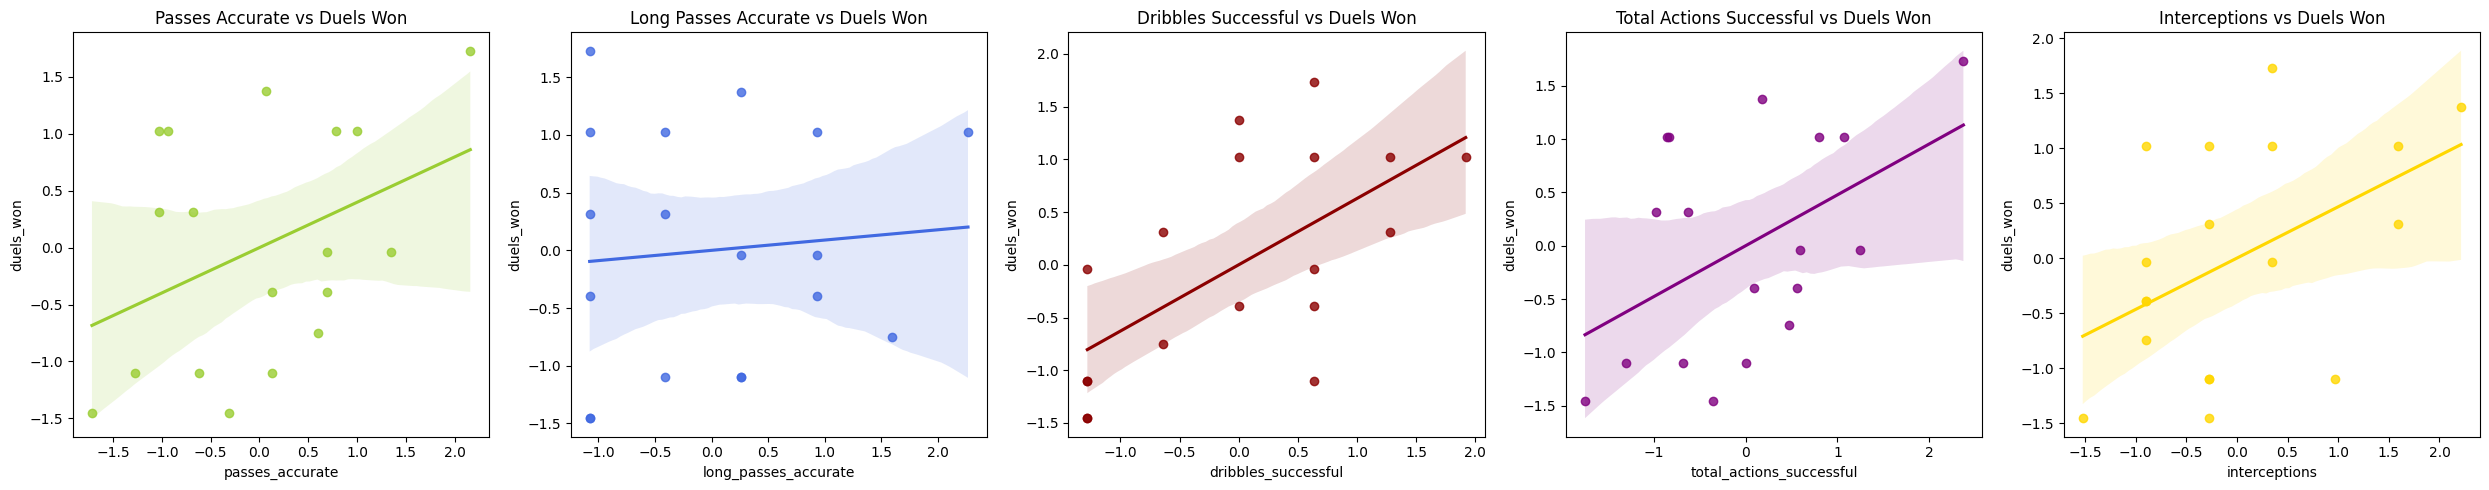

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'total_actions_successful', 'interceptions']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'total_actions_successful', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Interceptions vs Duels Won')

plt.tight_layout()
plt.show()

Passes Accurate (-7.64):  the significantly negative coefficient for passes_accurate is quite perplexing and indicates an inverse relationship with performance, a result that might require further investigation. On football optics, this stark contradiction with Kovačić reputation for accurate passing could suggest a specific team tactic or game context where short-passing accuracy isn't the focal point, or it may point to underlying issues in the data or model.

Long Passes Accurate (0.20): the positive coefficient for long_passes_accurate suggests a moderate positive correlation with performance. On football optics, this aligns with Kovačić recognized ability to execute accurate long passes, contributing to his team's attacking strategies.

Dribbles Successful (0.12): The positive coefficient for dribbles_successful indicates a mild positive impact on the outcome, reflecting statistical relevance. On football optics, this showcases Kovačić capability to navigate through defenses with dribbling, though it may not be the standout feature of his game.

Total Actions Successful (7.91): the substantial positive coefficient for total_actions_successful denotes a strong correlation with performance, emphasizing the importance of overall success in various actions. On football optics, this highlights Kovačić comprehensive influence on the field, where his all-around effectiveness is vital to his team's success.

Interceptions (0.08): A modest positive coefficient for interceptions shows a slight correlation with the outcome from the statistical standpoint. On football optics, this reflects Kovačić ability to make tactical interceptions, an attribute that complements his overall midfield role.

Overall, with a mean r^2 value of 0.35 and a coefficient of determination of 0.76, the model exhibits a moderate fit. The mean squared error of 0.13 is quite low, suggesting a reasonable prediction accuracy. However, the large negative coefficient for passes_accurate is noteworthy and may require careful scrutiny, as it deviates from both statistical intuition and football understanding. The model provides insights into aspects of Kovačić game like long passing and overall effectiveness but may miss nuances that the negative coefficient for passes_accurate introduces.

In both statistical and football terms, the analysis presents a complex picture, where features like total_actions_successful resonate well with Kovačić playing style, but others might need further context or refinement to fully encapsulate his role and performance on the pitch.

### Based on Dribbles

Mean r^2 over all K-Fold folds: -0.6661888043849118
Coefficients:
total_actions_successful: 0.09452997261913422
duels_won: -0.21142961440590813
recoveries_opp_half: 0.3601238203954905
interceptions: 0.3075779235065095
Mean squared error: 1.57
Coefficient of determination: 0.18


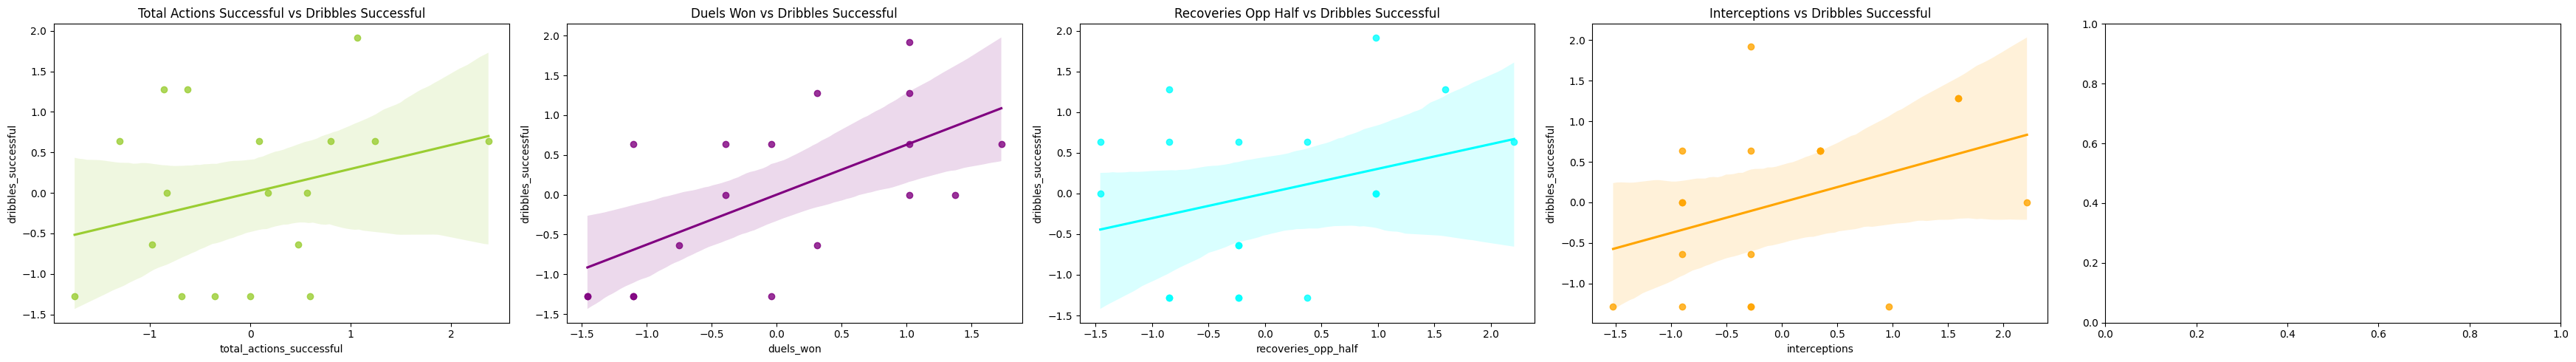

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'recoveries_opp_half','duels_won', 'interceptions']]
y = normalized_df['dribbles_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'duels_won', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(35, 5))

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, color='purple', ax=axs[1])
axs[1].set_title('Duels Won vs Dribbles Successful')

sns.regplot(x='recoveries_opp_half', y='dribbles_successful', data=normalized_df, color='cyan', ax=axs[2])
axs[2].set_title('Recoveries Opp Half vs Dribbles Successful')

sns.regplot(x='interceptions', y='dribbles_successful', data=normalized_df, color='orange', ax=axs[3])
axs[3].set_title('Interceptions vs Dribbles Successful')

plt.tight_layout()
plt.show()

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

MAE: 0.2317796025641735
MSE: 0.07309545532125677
R^2: 0.8733802863197702


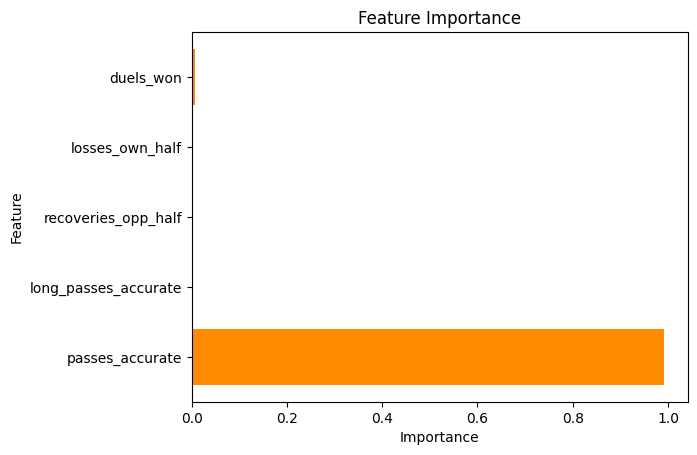

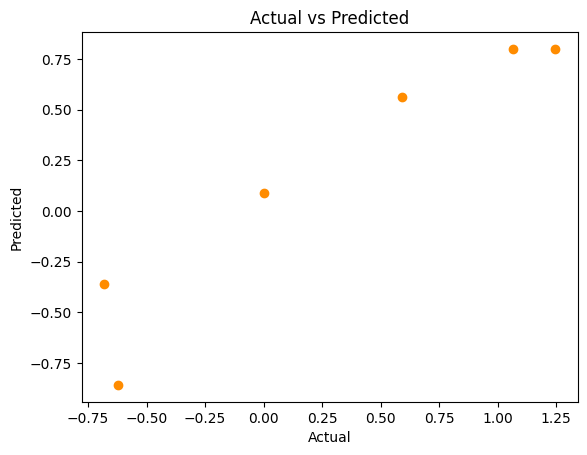

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'recoveries_opp_half', 'losses_own_half', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange')  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- We used XGBoost, a type of gradient boosting model, to predict Mateo Kovacic's performance, specifically the total actions successful. XGBoost models are powerful and often provide excellent predictive performance.

- The Mean Absolute Error (MAE) is 0.23. The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation. Lower values are better. Our MAE suggests that on average, the model's predictions are about 0.23 units away from the actual values.

- The Mean Squared Error (MSE) is 0.07. The MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. Lower values are better. The relatively low MSE indicates that the model's predictions are fairly close to the actual observations, although not as close as in the Linear Regression models we discussed earlier.

- The R-squared (R^2) is 0.87. The R^2 is a measure of how well our model's predictions fit the actual data. An R^2 of 1 indicates that the model explains all the variability of the response data around its mean. In this case, an R^2 of approximately 0.87 suggests that the model explains about 87% of the variation in Kovacic's total successful actions. On football optics, the XGBoost model suggests that Kovacic's total successful actions are relatively predictable based on the features in the model. While the model isn't perfect (as evidenced by the MAE and MSE), it does a reasonably good job. The fact that the R^2 is not 1 also tells us that there are other factors at play that the model might not be considering. In the real world of football, these could be intangibles like team chemistry, tactical decisions, or even the condition of the pitch on a given day. 

- Overall, the model suggests that Kovacic is a consistent performer whose actions on the field are largely predictable and reliably contribute to his team's success.

### Based on Duels Won

MAE: 0.5607664355009913
MSE: 0.5289202861296398
R^2: 0.0725977638865124


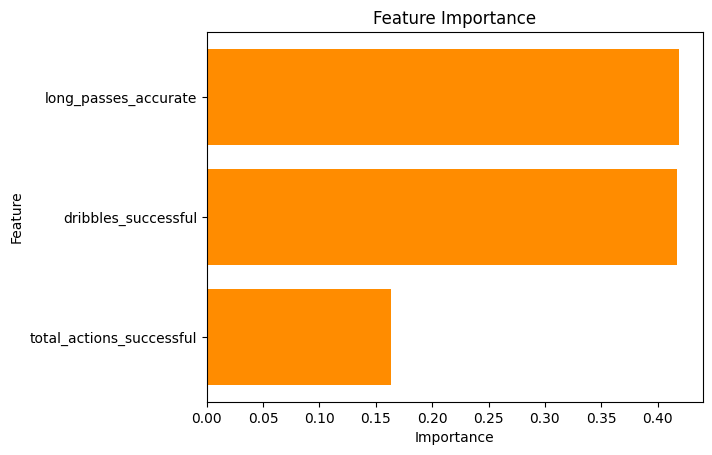

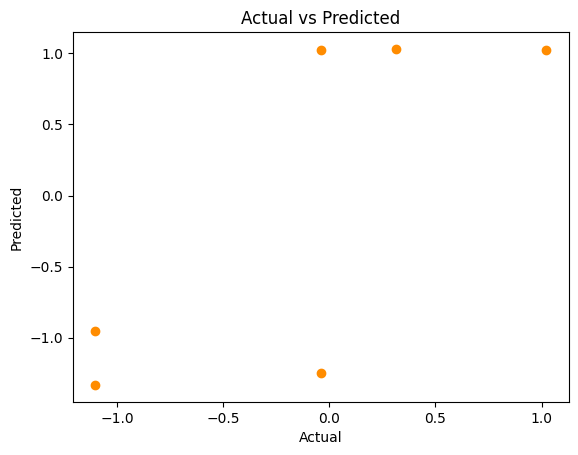

In [ ]:
# Prepare the data
X = normalized_df[[ 'total_actions_successful', 'dribbles_successful', 'long_passes_accurate' ]]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) (0.56): might be seen as a moderate error. For instance, if we're considering the number of duels won in a game, an average error of approximately 0.56 duels might be significant. On football optics, Given the combative nature of central midfielders like Kovačić, even a small error in predicting the number of duels won can be meaningful. This error could hint at the unpredictable nature of midfield battles and the variable success rate across different matches.

Mean Squared Error (MSE) (0.52): is a squared measure of how off the predictions are. An MSE of 0.53 suggests that there might be some instances where the predictions deviate significantly from the actual values, even more so than what the MAE alone would imply. On football optics, This further underlines the potential inconsistencies in predicting Kovačić's duels. Factors like the quality of the opposition, tactical demands of the game, or even individual physical conditions on a particular day might lead to a varied number of duels won.

Coefficient of Determination (R^2) (0.07): is rather low. It indicates that the model explains only about 7.3% of the variance in Kovačić's duels won. A value this low might suggest that the model doesn't have a strong fit to the data and there are other unconsidered factors that play a role in the target variable. On football optics, this implies that there's a lot about Kovačić's duel-winning ability that isn't captured by the model. Football duels, especially in the midfield, are intricate and influenced by multiple elements — tactical setups, individual decisions, physical confrontations, etc. The low R^2 accentuates that predicting them with precision is challenging.

To wrap up, the XGBoost Regressor Model for Mateo Kovačić based on "Duels Won" suggests that while there is some understanding of his duel-winning tendencies, there's much variability that remains unexplained. In the football context, this resonates with the unpredictable nature of midfield battles, which can swing due to a multitude of reasons. For an improved model, a more granular dataset, consideration of additional features, or perhaps a different modeling technique might be necessary.

### Based on Recoveries

MAE: 0.9070049327405032
MSE: 1.1101575370918644
R^2: -1.2331641197519208


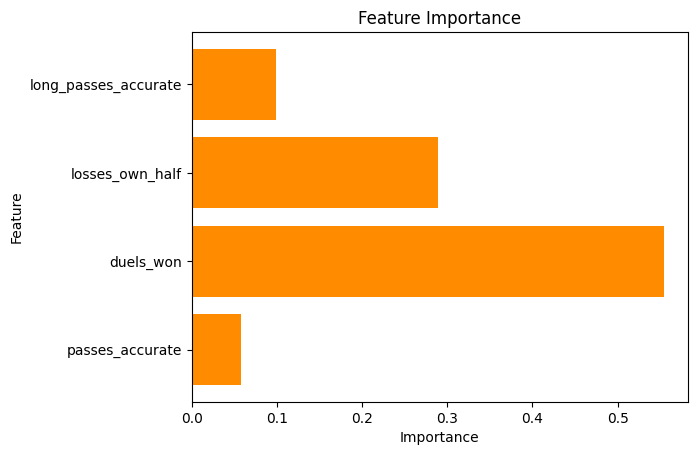

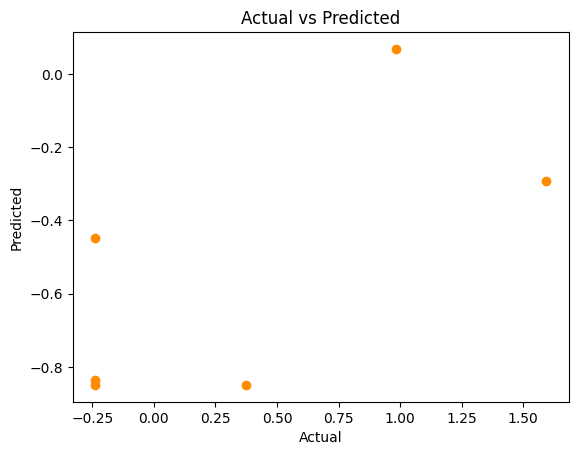

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'duels_won', 'losses_own_half', 'long_passes_accurate']]
y = normalized_df['recoveries_opp_half']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) (0.90): suggests that, on average, the model's predictions are off by approximately 0.91 units from the actual values. Depending on the scale and context of the data (for instance, if we're considering the number of recoveries in a single match), this might be a notable deviation. On football optics, For a midfielder like Kovačić, recoveries are essential as they mark transitions from defense to attack. An average error of around 0.91 recoveries per game could make a difference in the control of a match, especially in tight contests.

Mean Squared Error (MSE) (1.11): is higher than the MAE, suggesting that there might be instances where the model's predictions are considerably different from the actual outcomes, hence leading to higher squared errors. On football optics, This reiterates that predicting Kovačić's recovery patterns in matches is challenging. Different opponents, game dynamics, and tactical setups might lead to significant variability in his recovery numbers.

Coefficient of Determination (R^2) (-1.23): is very concerning. Typically, R^2 values range from 0 to 1, with 1 being a perfect fit. However, negative values suggest the model performs worse than a simplistic horizontal mean line. In essence, this model does not seem to capture the patterns in Kovačić's recoveries effectively. On football optics, This tells us that there's a lot about Kovačić's recovery patterns that the model isn't capturing. The complex dynamics of midfield play, including positioning, reading of the game, and tactical instructions, might be factors that the model isn't accounting for, resulting in its poor performance.

In summary, the XGBoost Regressor Model for Mateo Kovačić based on "Recoveries" indicates significant challenges in capturing and predicting his performance in this metric. The model's high errors and the concerning R^2 value suggest it might not be the right approach or that crucial features are missing. From a football perspective, recoveries, especially for central midfielders, can be influenced by myriad factors, making them a tricky metric to forecast with precision.

## Conformal Predictions

#### Provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 86.53%
Average prediction interval width: 2.59


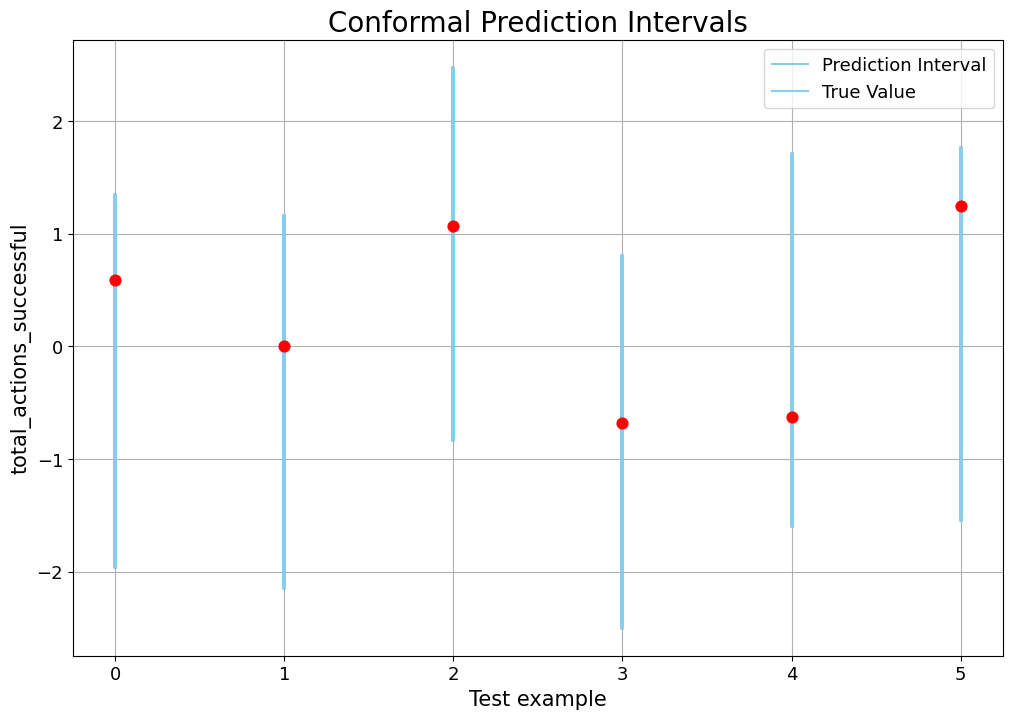

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'dribbles_successful', 'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()

Prediction interval coverage (86.53%): is impressive. This level of accuracy means that the model is predicting the range within which Kovačić's actual total actions fall in a game about 86.5% of the time. Such a high coverage rate indicates that the model has a strong understanding of Kovačić's gameplay patterns and involvement in matches. On football optics, underscores Kovačić's consistent involvement in Chelsea's gameplay. Known for his ball-carrying ability and pressing, Kovačić is often an integral part of the team's midfield actions. The model’s high prediction interval coverage might suggest that regardless of the opposition or match situation, Kovačić typically retains a consistent level of involvement.

Average prediction interval width: (2.59): especially given the impressive coverage rate, indicates a reasonable level of precision in the model's predictions about Kovačić's total actions. However, there's always potential to further refine this width for even greater precision. Analyzing outliers or incorporating additional contextual factors might help in achieving that. On football optics, shows that Kovačić's engagement in matches can exhibit a small degree of variability. This might be attributed to factors such as tactical adjustments, the nature of the match, or the specific role he's assigned in a particular game.

In summary, the conformal prediction outcomes for Mateo Kovačić's "Total Actions" paint a picture of a consistent and heavily-involved midfielder. The model seems to capture this essence fairly well, though as always, there might be some areas to fine-tune for better precision.

### Based on Duels  Won

Prediction interval coverage: 93.27%
Average prediction interval width: 2.50


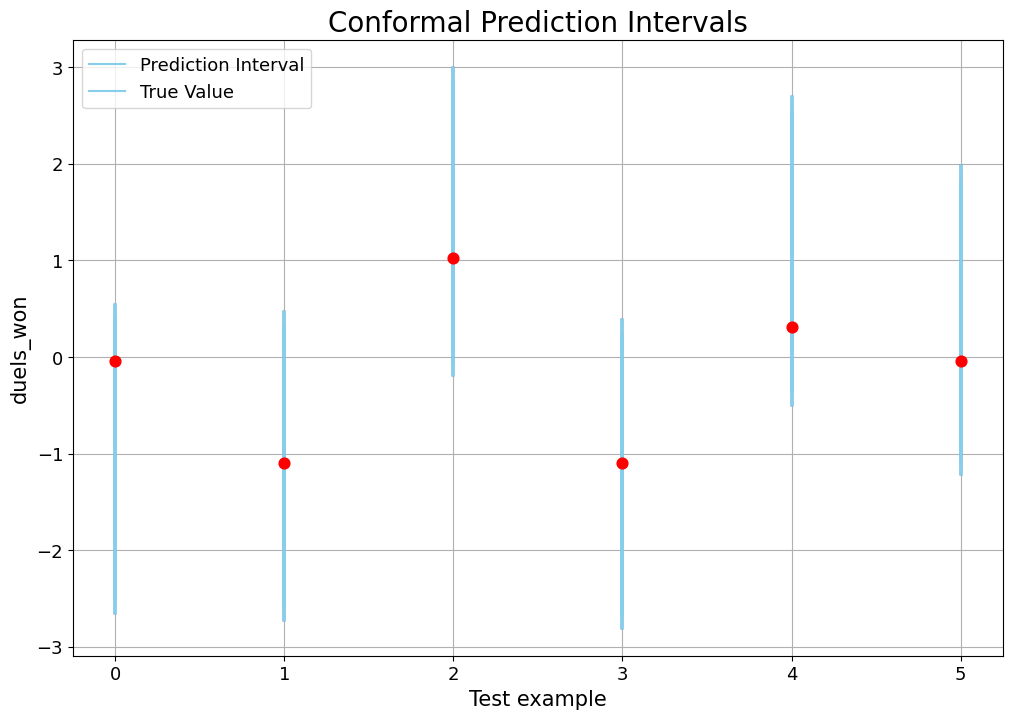

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'dribbles_successful', 'total_actions_successful']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()


Prediction interval coverage (93.27%): Achieving a prediction interval coverage of 93.27% for "Duels Won" is outstanding. This suggests that the model is incredibly adept at predicting the range within which Kovačić's actual duels won fall during a match. Having such a high coverage rate speaks volumes about the model's effectiveness, especially for this particular metric in relation to Kovačić's gameplay. On football optics, underlines Kovačić's tenacity and skill in individual battles on the pitch. Renowned for his ability to retain possession under pressure, this high coverage rate corroborates the sentiment that Kovačić is often reliable in duels, be it aerial or on the ground.

Average prediction interval width (2.50): considering the outstanding coverage rate, the model's predictions about Kovačić's duels won in a game exhibit a commendable level of precision. While the prediction range is already quite narrow, any further tightening would be beneficial for even more pinpoint predictions, if possible. On football optics, an average prediction interval width of 2.50 for "Duels Won" suggests that while Kovačić is consistent in winning his individual battles, there's a small degree of variability based on factors such as the type of opposition or the dynamics of a particular game. It's noteworthy that such a player maintains this consistency across various match scenarios.

In wrapping up, the conformal prediction outcomes for Mateo Kovačić's "Duels Won" highlight his prowess and consistency in one-on-one situations on the field. The model seems very attuned to this aspect of his game, achieving a striking balance between accuracy and precision. 

### Based on Recoveries

Prediction interval coverage: 66.50%
Average prediction interval width: 2.61


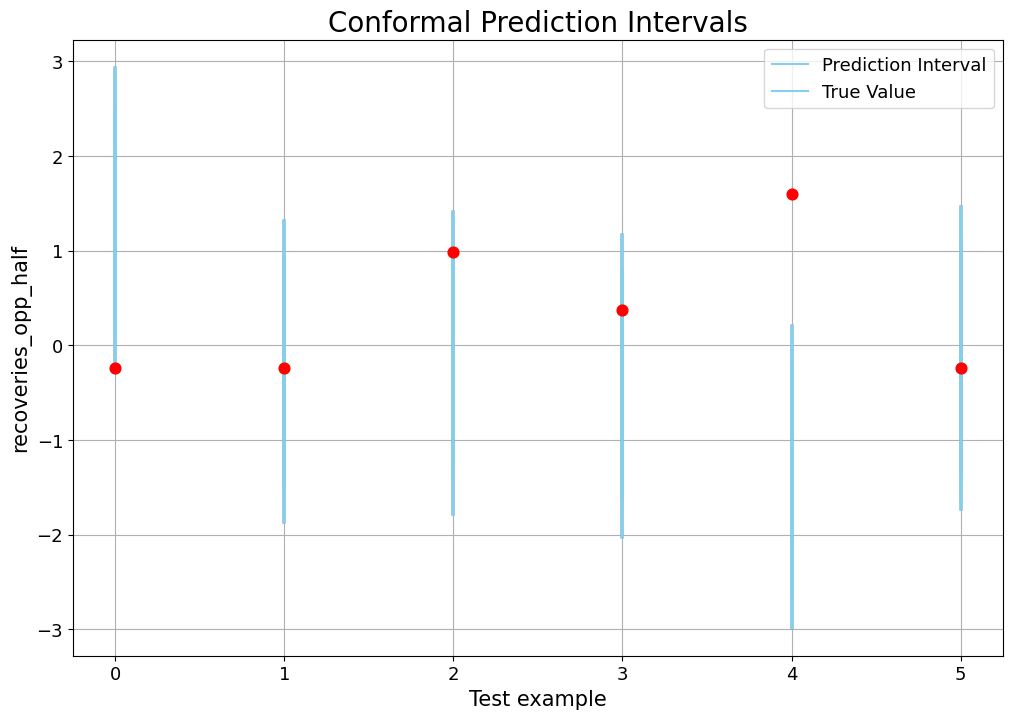

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'dribbles_successful', 'duels_won', 'total_actions_successful', 'interceptions']]
y = normalized_df['recoveries_opp_half']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('recoveries_opp_half', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()

Prediction interval coverage (66.50%): suggests that about two-thirds of the time, the model accurately captures the range within which Kovačić's actual recoveries fall during a match. While this is a decent level of accuracy, there's some room for improvement, especially when compared to the exceptional results we observed for "Duels Won". This could potentially be due to the more dynamic nature of recoveries, which might be influenced by numerous on-field variables. On football optics, signifies Kovačić's active involvement in regaining possession. It also suggests that the number of times he retrieves the ball can be influenced by various match situations, such as the tactical approach, the type of opposition, or even the game's flow. 

Average prediction interval width (2.61): provides an insight into the variability of the model's predictions concerning Kovačić's ball retrieval actions. This range, although not overly wide, could potentially be narrowed further. Examining outliers and perhaps incorporating more contextual data points might help refine this width. On football optics, alludes to the fact that Kovačić's efforts in recovering the ball can differ based on numerous game-related factors. For instance, in matches where Chelsea is largely dominating, his recoveries might be fewer but strategic, while in more contested games, his number of recoveries might increase.

In conclusion, the conformal prediction outcomes for Mateo Kovačić's "Recoveries" shine light on his role as a midfielder who often intervenes to regain possession. While the model captures this aspect fairly well, there are nuances that could be further examined for better precision and accuracy.

## Rada Maps

### Kovacic Chelsea 1st Leg 2022

- Total Actions Success (TAS):  80%

- Passes Accurate(PA):  92 %

- Long Passes Accurate (LPA):  0%

- Dribbles (DS):   0%

- Duels Won (DW):   50%

- Losses (LOH):   0%

- Recoveries (ROPH): 100%

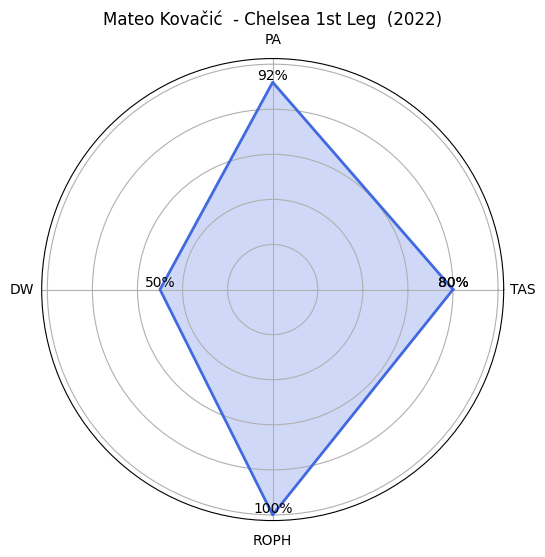

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DW', 'ROPH'])
stats = np.array([80, 92, 50, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Mateo Kovačić  - Chelsea 1st Leg  (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kovacic Chelsea 2nd Leg 2022

- Total Actions Success (TAS):  79%

- Passes Accurate(PA):  95 %

- Long Passes Accurate (LPA): 60%

- Dribbles (DS):   71%

- Duels Won (DW):   52%

- Losses (LOH):   43%

- Recoveries (ROPH): 57%

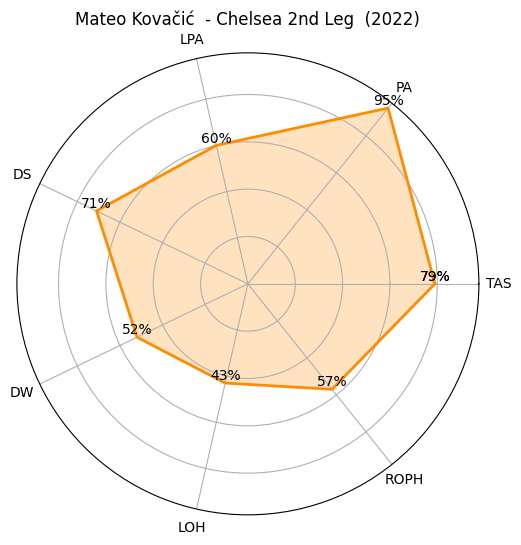

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS',  'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([79, 95, 60, 71, 52, 43, 57])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Mateo Kovačić  - Chelsea 2nd Leg  (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkorange', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkorange', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kovacic Chelsea 1st Leg 2023

- Total Actions Success (TAS):  72%

- Passes Accurate(PA):  91 %

- Long Passes Accurate (LPA):  67%

- Dribbles (DS):   0%

- Duels Won (DW):   42%

- Losses (LOH):   44%

- Recoveries (ROPH): 40%

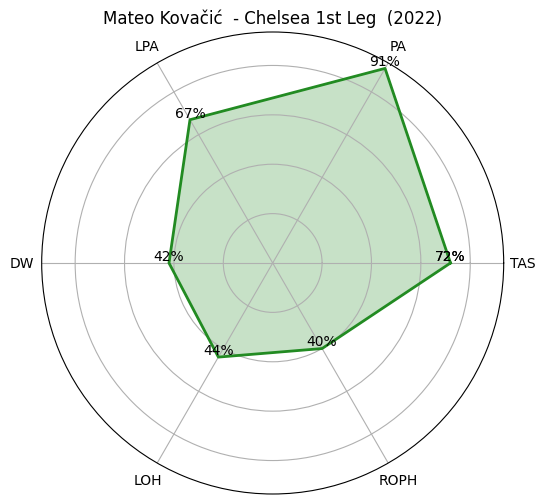

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS',  'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([72, 91, 67, 42, 44, 40])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Mateo Kovačić  - Chelsea 1st Leg  (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kovacic Chelsea 2nd Leg 2023

- Total Actions Success (TAS):  90%

- Passes Accurate(PA):  95 %

- Long Passes Accurate (LPA):  67%

- Dribbles (DS):   0%

- Duels Won (DW):   67%

- Losses (LOH):   33%

- Recoveries (ROPH): 67%

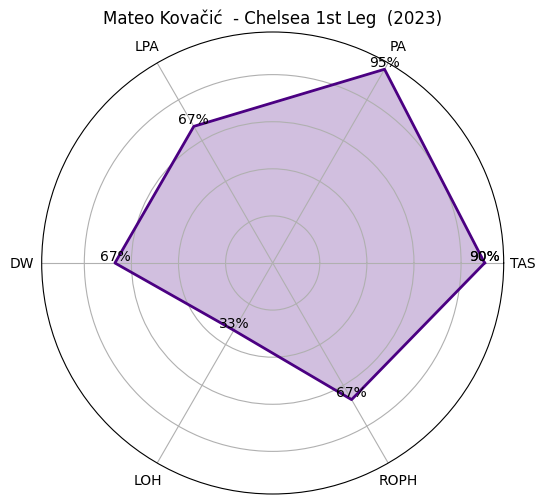

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([90, 95, 67, 67, 33, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Mateo Kovačić  - Chelsea 1st Leg  (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='indigo', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='indigo', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44bff768-a847-40f8-bd12-dc3cbaac24c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>